# **Sprint#2. 고객이탈예측 모델링**
- 리워드유효여부에 따라 별도 모델링
- 비시계열/시계열 별도 데이터 셋 구성 

## 데이터셋 구성
- 앱로그
1. 상위 depth별 월평균 체류시간
2. 하위 depth별 월평균 체류시간
3. 종료율 

3-1) 고이용군은 높으나 장기미접속군은 낮은 페이지별 종료율

3-2) 장기미접속군은 높으나 고이용군은 낮은 페이지별 종료율


4. 월평균 세션별 페이지수 

- 주간미션/리워드
1. 월별 주간미션 달성률
2. 월별 리워드 획득횟수

- 멤버
1. 앱푸쉬 여부
2. 월별 바이탈리티 측정횟수
3. 성별
4. 연령대
5. 등급승격소요일
6. 누적월별주간미션달성률


In [1]:
# google drive와 colab연동
from google.colab import auth

auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
path="./gdrive/MyDrive/Vitality 고객 행동 예측 과제/Data/"
os.chdir(path)

In [3]:
os.getcwd()

'/content/gdrive/MyDrive/Vitality 고객 행동 예측 과제/Data'

In [5]:
# import module
import pandas as pd
  
# assign dataset names
list_of_names = ['goal_misn_202011','goal_misn_202012']
  
# create empty list
dataframes_list = []
  
# append datasets into teh list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv("Goal_Mission/"+list_of_names[i]+".csv", usecols= ['dt','party_id', 'goal_id','objective_sta_dt', 'objective_state',
                                                    'points_target', 'goal_state', 'points_achieved', 'objective_end_dat',
                                                    'goal_end_dt', 'goal_status_chg_dt', 'objective_status_chg_dt',
                                                    'vchr_dc', 'vchr_sta_dt', 'vchr_sel_dt', 'vchr_expr_dt', 'vchr_st_cd',
                                                    'vchr_value', 'vchr_sel_dt_ori', 'event_id', 'd_event_name', 'd_event_value',
                                                    'd_event_apl_dte','points_name','p_event_apl_dte', 'points_value', 'points_effective_dte',
                                                    'points_reason_category', 'points_reason', 'conn_equip', 'fst_reg_dte'])
    dataframes_list.append(temp_df)

In [6]:
temp_df

,party_id,goal_id,objective_sta_dt,objective_state,points_target,goal_state,points_achieved,objective_end_dat,goal_end_dt,goal_status_chg_dt,objective_status_chg_dt,vchr_dc,vchr_sta_dt,vchr_sel_dt,vchr_expr_dt,vchr_st_cd,vchr_value,vchr_sel_dt_ori,event_id,d_event_name,d_event_value,d_event_apl_dte,points_name,p_event_apl_dte,points_value,points_effective_dte,points_reason_category,points_reason,conn_equip,fst_reg_dte,dt
0,21449994,1266222101,20201130,Achieved,450,Achieved Goal,450,20201206,20201206,20201204,20201204,SK Telecom Voucher,20201204,20201204,20201217,Used,KRW3000.00,20201204,8626678294,Total Steps,13253,20201202,Steps,20201202,100,20201201,Conditions,You earned the maximum points available for th...,#,#,20201201
1,27678478,1266188218,20201130,Achieved,300,Achieved Goal,300,20201206,20201206,20201207,20201207,SK Telecom Voucher,20201207,20201207,20201220,Used,KRW3000.00,20201207,8627408605,Total Steps,9942,20201202,Steps,20201202,50,20201201,Conditions,You earned the maximum points available for th...,S Health Third-party,20201202,20201201
2,33667477,1264067146,20201130,Not Achieved,350,Goal Not Achieved,200,20201206,20201206,20201125,20201125,#,#,#,#,#,#,#,8626444307,Total Steps,9670,20201201,Steps,20201201,50,20201201,Conditions,You earned the maximum points available for th...,S Health Third-party,20201201,20201201
3,40006087,1265950590,20201130,Achieved,500,Achieved Goal,500,20201206,20201206,20201206,20201206,#,#,#,#,#,#,#,8626691570,Distance,6,20201202,#,#,#,#,#,#,#,#,20201201
4,40006087,1265950590,20201130,Achieved,500,Achieved Goal,500,20201206,20201206,20201206,20201206,#,#,#,#,#,#,#,8626691570,Average Heart Rate,73,20201202,Steps,20201202,50,20201201,Conditions,You earned the maximum points available for th...,#,#,20201201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851958,1200268001,1275617666,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,SK Telecom Voucher,20210102,20210102,20210115,Used,KRW3000.00,20210102,8678128720,Total Steps,16830,20210101,Steps,20210101,100,20201231,Conditions,You earned the maximum points available for th...,#,#,20201231
851959,1200268001,1275617666,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,SK Telecom Voucher,20210102,20210102,20210115,Used,KRW3000.00,20210102,8678128720,Distance,14,20210101,#,#,#,#,#,#,#,#,20201231
851960,1200273304,1275619684,20201228,Achieved,250,Achieved Goal,250,20210103,20210103,20210102,20210102,SK Telecom Voucher,20210102,20210102,20210115,Used,KRW3000.00,20210102,8678522104,Total Steps,7552,20210101,Steps,20210101,50,20201231,Conditions,You earned the maximum points available for th...,S Health Third-party,20210101,20201231
851961,1200273304,1275619684,20201228,Achieved,250,Achieved Goal,250,20210103,20210103,20210102,20210102,SK Telecom Voucher,20210102,20210102,20210115,Used,KRW3000.00,20210102,8678522104,Distance,6,20210101,#,#,#,#,#,#,S Health Third-party,20210101,20201231


- sta_dt : 주간미션시작일
- goal_type_name : 주간미션타입
- objective_sta_dt : 주간미션시작일
- GoalObjectiveState : 주간미션상태
- GoalObjectivePointsTarget : 주간미션목표포인트
- GoalTargetState : 주간미션목표상태
- PointsEarnedTowardGoalObj : 주간미션포인트획득상태
- GoalObjectiveEndDate : 주간미션종료일, 성공한 날짜 
- GoalEndDate : 미션 end 기한
- GoalStatusChangedOn : 주간미션상태변경일 , status 업데이트 날짜 (미달성>달성)
- GoalObjectiveStatusChangedOn : 주간미션연동일
- vchr_dc : 리워드설명 
- vchr_sta_dt : 리워드시작일시
- vchr_sel_dt : 리워드 선택일자
- vchr_expr_dt : 리워드만료일시
- Voucher Status : 리워드상태
- vchr_value : 리워드금액
- vchr_sel_dt_ori : 리워드 최초 선택일시 
- event_id : 이벤트아이디
- 'd_event_category_name' : 이벤트카테고리 # 모두 device로 의미 없음
- 'd_event_name': 이벤트 타입명
- 'd_event_value': 활동 수 (걸음, 심박수)
- 'd_event_apl_dte': 이벤트 동기화 일시
- 'p_event_category_name': 이벤트 카테고리
- 'p_event_type_name': 이벤트 타입명
- 'points_name': 포인트 획득한 활동 (Steps, Heart Rate)
- 'p_event_apl_dte': 포인트 반영 일시
- 'points_value': 획득 포인트
- 'points_effective_dte': 포인트 발생일시
- 'points_reason_category': 포인트 획득사유 유형
- 'points_reason': 포인트 획득사유
- 'conn_equip': 디바이스제조사명
- 'fst_reg_dte': 최초연동일시(앱 재설치 시 설치 후 디바이스 연동 날짜로 업데이트)
- dt : 파티션


In [8]:
# 컬럼명 변경
df = temp_df.rename(columns = { 'objective_sta_dt': '주간미션시작일', 'objective_state': '주간미션상태',
                            'points_target': '주간미션목표포인트', 'goal_state': '주간미션목표상태',
                            'points_achieved': '주간미션포인트획득상태', 'objective_end_dat': '주간미션성공일',
                            'goal_end_dt': '미션종료기한일', 'goal_status_chg_dt': '주간미션상태변경일' ,
                            'objective_status_chg_dt' : '주간미션연동일', 'vchr_dc' : '리워드설명',
                            'vchr_sta_dt': '리워드시작일', 'vchr_sel_dt': '리워드선택일', 'vchr_expr_dt': '리워드만료일',
                            'Voucher Status': '리워드상태', 'vchr_value': '리워드금액', 'vchr_st_cd':'리워드사용여부',
                            'vchr_sel_dt_ori': '리워드최초선택일', 'd_event_name': '이벤트타입명',
                            'd_event_value': '활동수','d_event_apl_dte': '이벤트동기화일',
                            'p_event_apl_dte': '포인트반영일', 'points_name' : '활동구분',
                            'points_value': '획득포인트', 'points_effective_dte':'포인트발생일',
                            'points_reason_category': '포인트획득사유유형','points_reason': '포인트획득사유',
                            'conn_equip': '디바이스제조사명','fst_reg_dte': '최초연동일'}, inplace = False)

In [9]:
df.head()

,party_id,goal_id,주간미션시작일,주간미션상태,주간미션목표포인트,주간미션목표상태,주간미션포인트획득상태,주간미션성공일,미션종료기한일,주간미션상태변경일,주간미션연동일,리워드설명,리워드시작일,리워드선택일,리워드만료일,리워드사용여부,리워드금액,리워드최초선택일,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명,최초연동일,dt
0,21449994,1266222101,20201130,Achieved,450,Achieved Goal,450,20201206,20201206,20201204,20201204,SK Telecom Voucher,20201204,20201204,20201217,Used,KRW3000.00,20201204,8626678294,Total Steps,13253,20201202,Steps,20201202,100,20201201,Conditions,You earned the maximum points available for th...,#,#,20201201
1,27678478,1266188218,20201130,Achieved,300,Achieved Goal,300,20201206,20201206,20201207,20201207,SK Telecom Voucher,20201207,20201207,20201220,Used,KRW3000.00,20201207,8627408605,Total Steps,9942,20201202,Steps,20201202,50,20201201,Conditions,You earned the maximum points available for th...,S Health Third-party,20201202,20201201
2,33667477,1264067146,20201130,Not Achieved,350,Goal Not Achieved,200,20201206,20201206,20201125,20201125,#,#,#,#,#,#,#,8626444307,Total Steps,9670,20201201,Steps,20201201,50,20201201,Conditions,You earned the maximum points available for th...,S Health Third-party,20201201,20201201
3,40006087,1265950590,20201130,Achieved,500,Achieved Goal,500,20201206,20201206,20201206,20201206,#,#,#,#,#,#,#,8626691570,Distance,6,20201202,#,#,#,#,#,#,#,#,20201201
4,40006087,1265950590,20201130,Achieved,500,Achieved Goal,500,20201206,20201206,20201206,20201206,#,#,#,#,#,#,#,8626691570,Average Heart Rate,73,20201202,Steps,20201202,50,20201201,Conditions,You earned the maximum points available for th...,#,#,20201201


## 전체 전처리
1. 일자 변환
2. 주차 추가
3. 요일 추가 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851963 entries, 0 to 851962
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   party_id     851963 non-null  int64 
 1   goal_id      851963 non-null  object
 2   주간미션시작일      851963 non-null  object
 3   주간미션상태       851963 non-null  object
 4   주간미션목표포인트    851963 non-null  object
 5   주간미션목표상태     851963 non-null  object
 6   주간미션포인트획득상태  851963 non-null  object
 7   주간미션성공일      851963 non-null  object
 8   미션종료기한일      851963 non-null  object
 9   주간미션상태변경일    851963 non-null  object
 10  주간미션연동일      851963 non-null  object
 11  리워드설명        851963 non-null  object
 12  리워드시작일       851963 non-null  object
 13  리워드선택일       851963 non-null  object
 14  리워드만료일       851963 non-null  object
 15  리워드사용여부      851963 non-null  object
 16  리워드금액        851963 non-null  object
 17  리워드최초선택일     851963 non-null  object
 18  event_id     851963 non-null  int64 
 19  이벤

In [11]:
# 일자 변환
df['dt']=df['dt'].astype('str')
df['이벤트동기화일']=df['이벤트동기화일'].astype('str')

df['dt'] = pd.to_datetime(df['dt'],format='%Y%m%d')
df['이벤트동기화일'] = pd.to_datetime(df['이벤트동기화일'],format='%Y%m%d')

# 주차 정보 추가
df['Week'] = pd.factorize(df['dt'].dt.weekofyear)[0] + 1

# 요일 추가
df['day_of_week'] = df['dt'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [12]:
df.head(1)

,party_id,goal_id,주간미션시작일,주간미션상태,주간미션목표포인트,주간미션목표상태,주간미션포인트획득상태,주간미션성공일,미션종료기한일,주간미션상태변경일,주간미션연동일,리워드설명,리워드시작일,리워드선택일,리워드만료일,리워드사용여부,리워드금액,리워드최초선택일,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명,최초연동일,dt,Week,day_of_week
0,21449994,1266222101,20201130,Achieved,450,Achieved Goal,450,20201206,20201206,20201204,20201204,SK Telecom Voucher,20201204,20201204,20201217,Used,KRW3000.00,20201204,8626678294,Total Steps,13253,2020-12-02,Steps,20201202,100,20201201,Conditions,You earned the maximum points available for th...,#,#,2020-12-01,1,Tues


In [13]:
# 주간미션/리워드/활동별로 파일 쪼개기
ms = df[['Week','party_id','goal_id','주간미션시작일', '주간미션상태', '주간미션목표포인트', '주간미션목표상태',
       '주간미션포인트획득상태', '주간미션성공일', '미션종료기한일', '주간미션상태변경일', '주간미션연동일']]
ms = ms.drop_duplicates()
ms 

,Week,party_id,goal_id,주간미션시작일,주간미션상태,주간미션목표포인트,주간미션목표상태,주간미션포인트획득상태,주간미션성공일,미션종료기한일,주간미션상태변경일,주간미션연동일
0,1,21449994,1266222101,20201130,Achieved,450,Achieved Goal,450,20201206,20201206,20201204,20201204
1,1,27678478,1266188218,20201130,Achieved,300,Achieved Goal,300,20201206,20201206,20201207,20201207
2,1,33667477,1264067146,20201130,Not Achieved,350,Goal Not Achieved,200,20201206,20201206,20201125,20201125
3,1,40006087,1265950590,20201130,Achieved,500,Achieved Goal,500,20201206,20201206,20201206,20201206
6,1,45707583,1266217687,20201130,Not Achieved,500,Goal Not Achieved,400,20201206,20201206,20201129,20201129
...,...,...,...,...,...,...,...,...,...,...,...,...
851835,5,66569582,1275483096,20201228,Not Achieved,200,In Progress Goal Tracker,100,20210103,20210103,20201225,20201225
851838,5,110283599,1274773512,20201228,Not Achieved,200,Pending Goal Tracker,0,20210103,20210103,20201224,20201224
851858,5,200323070,1275358906,20201228,Not Achieved,200,Pending Goal Tracker,50,20210103,20210103,20201225,20201225
851870,5,200785859,1274625121,20201228,Not Achieved,350,In Progress Goal Tracker,0,20210103,20210103,20201224,20201224


## 주간미션 분석항목
1. 고객별 월별 주간 미션 달성횟수/달성률
3. 리워드 획득횟수

In [14]:
ms['주간미션상태'].value_counts()

Achieved        91312
Not Achieved    67556
#                2127
Name: 주간미션상태, dtype: int64

In [ ]:
ms_suc = ms[ms['주간미션상태']=='Achieved']
ms_suc = ms_suc[['party_id','goal_id','Week','주간미션상태']]
ms_suc=ms_suc.drop_duplicates()
ms_suc['주간미션달성여부'] = ms_suc.groupby(['party_id'])['주간미션상태'].transform('nunique')
ms_suc['1월주간미션달성횟수'] = ms_suc.groupby(['party_id'])['주간미션달성여부'].transform('sum')
ms_suc

,party_id,goal_id,Week,주간미션상태,주간미션달성여부,1월주간미션달성횟수
0,4638477,1275631105,1,Achieved,1,5
4,11735495,1275569205,1,Achieved,1,5
6,22328999,1275397077,1,Achieved,1,5
8,27987988,1275663097,1,Achieved,1,5
10,30062477,1275419585,1,Achieved,1,5
...,...,...,...,...,...,...
1061174,200002222,1285032122,5,Achieved,1,3
1061767,1200279575,1284126410,5,Achieved,1,1
1062782,1200228248,1283621678,5,Achieved,1,1
1063046,201276881,1283546504,5,Achieved,1,1


In [ ]:
# 데이터 확인
ms_suc[ms_suc['party_id']=='9141996']

,party_id,goal_id,Week,주간미션상태,주간미션달성여부,1월주간미션달성횟수
59192,9141996,1275722090,1,Achieved,1,3
116609,9141996,1277912634,2,Achieved,1,3
868055,9141996,1284252460,5,Achieved,1,3


In [ ]:
ms_suc=ms_suc[['party_id','goal_id','주간미션달성여부','1월주간미션달성횟수']]
ms_edit = pd.merge(ms,ms_suc,how="left", on=["party_id","goal_id"])
ms_edit.head()

,Week,party_id,goal_id,주간미션시작일,주간미션상태,주간미션목표포인트,주간미션목표상태,주간미션포인트획득상태,주간미션성공일,미션종료기한일,주간미션상태변경일,주간미션연동일,1월주간미션참여횟수,1월주간미션참여률,주간미션달성여부,1월주간미션달성횟수
0,1,4638477,1275631105,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210103,20210103,5,100.0,1.0,5.0
1,1,9514492,1274142502,20201228,Not Achieved,200,Goal Not Achieved,0,20210103,20210103,20201224,20201224,2,40.0,NaN,NaN
2,1,11735495,1275569205,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,5,100.0,1.0,5.0
3,1,22328999,1275397077,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210101,20210101,5,100.0,1.0,5.0
4,1,27987988,1275663097,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,5,100.0,1.0,5.0


In [ ]:
ms_yn=ms_edit[['party_id','주간미션상태']]
ms_yn=ms_yn.drop_duplicates()
ms_yn=ms_yn[ms_yn["주간미션상태"]!='#']
ms_yn= ms_yn.groupby('주간미션상태')['party_id'].count()
ms_yn

주간미션상태
Achieved        30026
Not Achieved    32256
Name: party_id, dtype: int64

Text(0.5, 1.0, '11월 주간미션 달성여부')

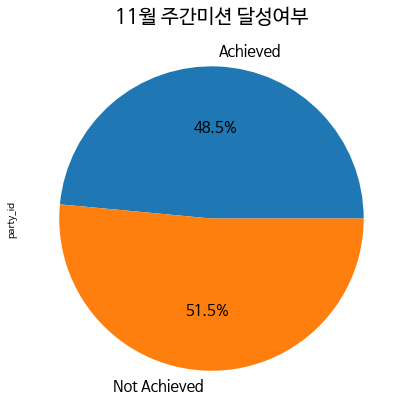

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
ms_yn.plot.pie(autopct="%.1f%%", fontsize = 15)
plt.title('11월 주간미션 달성여부', fontsize = 20)

Text(0.5, 1.0, '12월 주간미션 달성여부')

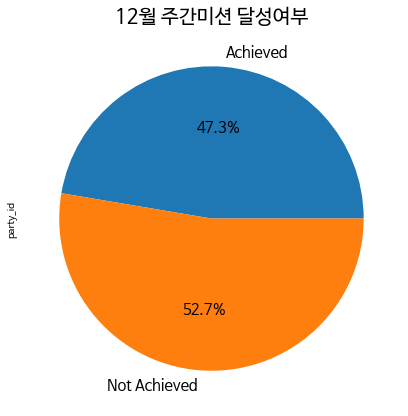

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
ms_yn.plot.pie(autopct="%.1f%%", fontsize = 15)
plt.title('12월 주간미션 달성여부', fontsize = 20)

Text(0.5, 1.0, '1월 주간미션 달성여부')

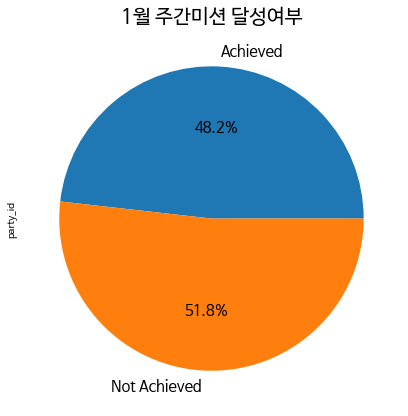

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
ms_yn.plot.pie(autopct="%.1f%%", fontsize = 15)
plt.title('1월 주간미션 달성여부', fontsize = 20)

Text(0.5, 1.0, '2월 주간미션 달성여부')

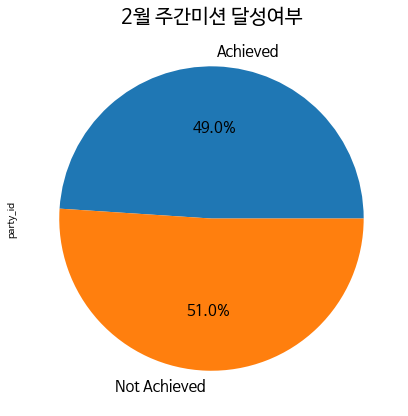

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
ms_yn.plot.pie(autopct="%.1f%%", fontsize = 15)
plt.title('2월 주간미션 달성여부', fontsize = 20)

In [ ]:
ms_edit['1월주간미션달성횟수'].fillna(0, inplace = True) 
ms_count=ms_edit[['party_id','1월주간미션달성횟수']]
ms_count=ms_count.drop_duplicates()
ms_count['1월주간미션달성횟수'].value_counts()

0.0    33679
1.0     9142
5.0     8499
2.0     5060
3.0     3741
4.0     3584
Name: 1월주간미션달성횟수, dtype: int64

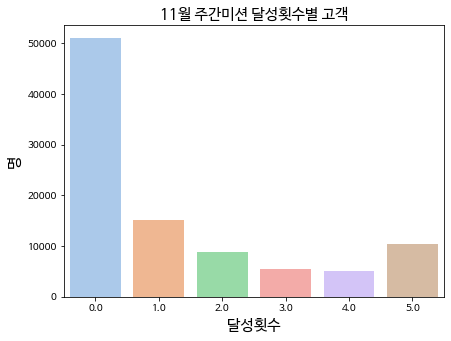

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(ms_count['11월주간미션달성횟수'], palette = 'pastel')
plt.title('11월 주간미션 달성횟수별 고객', fontsize = 15)
plt.xlabel('달성횟수', fontsize = 15)
plt.ylabel('명', fontsize = 15)
plt.show()

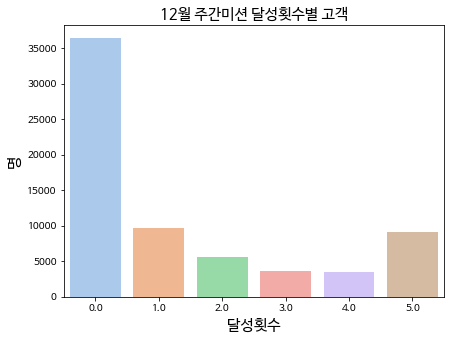

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(ms_count['12월주간미션달성횟수'], palette = 'pastel')
plt.title('12월 주간미션 달성횟수별 고객', fontsize = 15)
plt.xlabel('달성횟수', fontsize = 15)
plt.ylabel('명', fontsize = 15)
plt.show()

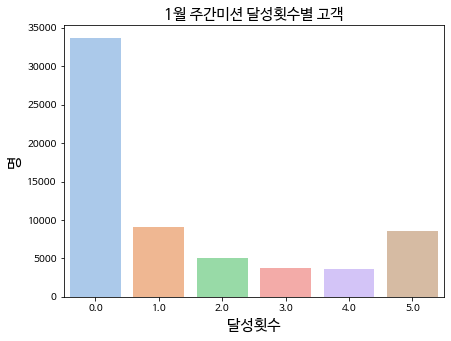

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(ms_count['1월주간미션달성횟수'], palette = 'pastel')
plt.title('1월 주간미션 달성횟수별 고객', fontsize = 15)
plt.xlabel('달성횟수', fontsize = 15)
plt.ylabel('명', fontsize = 15)
plt.show()

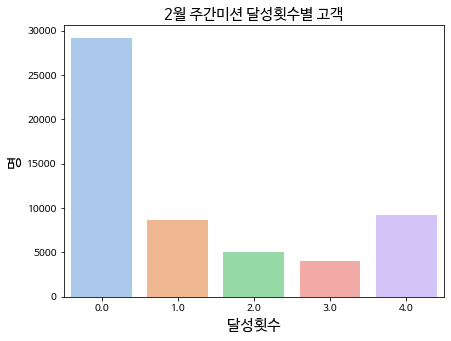

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(ms_count['2월주간미션달성횟수'], palette = 'pastel')
plt.title('2월 주간미션 달성횟수별 고객', fontsize = 15)
plt.xlabel('달성횟수', fontsize = 15)
plt.ylabel('명', fontsize = 15)
plt.show()

- 11월~2월 비슷한 분포
- 0회 > 1회 > 5회 > 2회 > 3회 > 4회 

In [ ]:
ms_edit['1월주간미션달성률'] = round(ms_edit['1월주간미션달성횟수']/ms_edit['1월주간미션참여횟수']*100,1)
ms_edit

,Week,party_id,goal_id,주간미션시작일,주간미션상태,주간미션목표포인트,주간미션목표상태,주간미션포인트획득상태,주간미션성공일,미션종료기한일,주간미션상태변경일,주간미션연동일,1월주간미션참여횟수,1월주간미션참여률,주간미션달성여부,1월주간미션달성횟수,1월주간미션달성률
0,1,4638477,1275631105,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210103,20210103,5,100.0,1.0,5.0,100.0
1,1,9514492,1274142502,20201228,Not Achieved,200,Goal Not Achieved,0,20210103,20210103,20201224,20201224,2,40.0,NaN,0.0,0.0
2,1,11735495,1275569205,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,5,100.0,1.0,5.0,100.0
3,1,22328999,1275397077,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210101,20210101,5,100.0,1.0,5.0,100.0
4,1,27987988,1275663097,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,5,100.0,1.0,5.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147934,5,1200247039,1284384137,20210125,Not Achieved,200,Pending Goal Tracker,0,20210131,20210131,20210121,20210121,3,60.0,NaN,0.0,0.0
147935,5,1200273316,1283870562,20210125,Not Achieved,200,In Progress Goal Tracker,0,20210131,20210131,20210121,20210121,3,60.0,NaN,0.0,0.0
147936,5,1200337530,#,#,#,#,#,#,#,#,#,#,1,20.0,NaN,0.0,0.0
147937,5,201233206,1284037321,20210125,Not Achieved,300,In Progress Goal Tracker,0,20210131,20210131,20210121,20210121,5,100.0,NaN,0.0,0.0


In [ ]:
ms_edit['Week']=ms_edit['Week'].astype('str')
ms_edit['주간미션달성여부']=ms_edit['주간미션달성여부'].astype('str')
ms_edit.describe()

,1월주간미션참여횟수,1월주간미션참여률,1월주간미션달성횟수,1월주간미션달성률
count,147939.000000,147939.000000,147939.000000,147939.000000
mean,4.001372,80.027444,2.250049,49.242712
std,1.311708,26.234153,2.164980,44.521261
min,1.000000,20.000000,0.000000,0.000000
25%,3.000000,60.000000,0.000000,0.000000
50%,5.000000,100.000000,2.000000,50.000000
75%,5.000000,100.000000,5.000000,100.000000
max,5.000000,100.000000,5.000000,100.000000


Text(0, 0.5, 'Count')

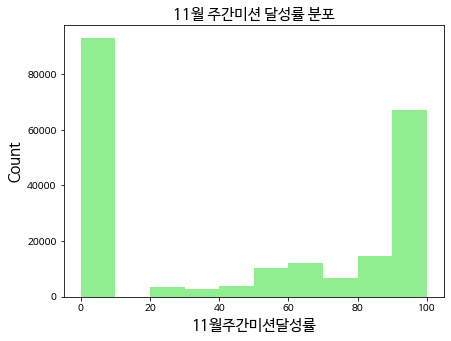

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 2, 1)
plt.hist(ms_edit['11월주간미션달성률'], color = 'lightgreen')
plt.title('11월 주간미션 달성률 분포',fontsize = 15)
plt.xlabel('11월주간미션달성률', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0.5, 1.0, '11월 주간미션 달성률 분포')

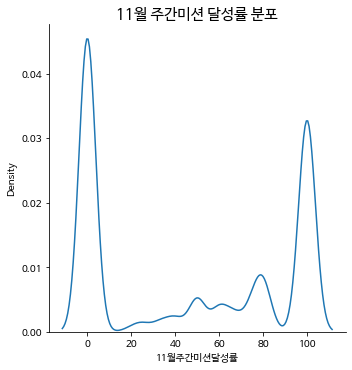

In [ ]:
sns.displot(ms_edit, x="11월주간미션달성률", kind="kde")
plt.title('11월 주간미션 달성률 분포', fontsize = 15)

Text(0, 0.5, 'Count')

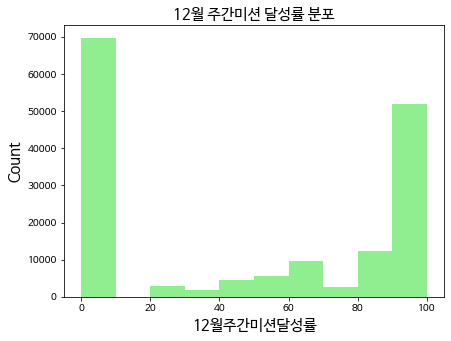

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
plt.hist(ms_edit['12월주간미션달성률'], color = 'lightgreen')
plt.title('12월 주간미션 달성률 분포',fontsize = 15)
plt.xlabel('12월주간미션달성률', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0.5, 1.0, '12월 주간미션 달성률 분포')

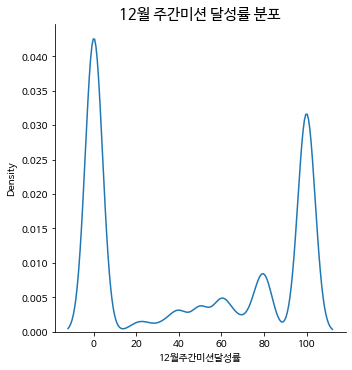

In [ ]:
sns.displot(ms_edit, x="12월주간미션달성률", kind="kde")
plt.title('12월 주간미션 달성률 분포', fontsize = 15)

Text(0, 0.5, 'Count')

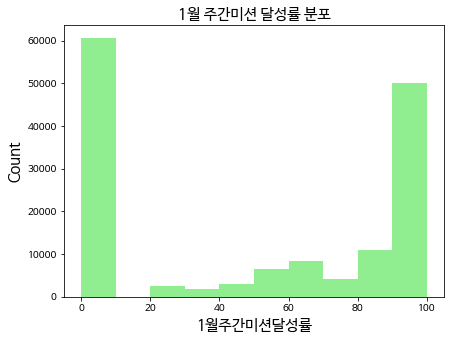

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
plt.hist(ms_edit['1월주간미션달성률'], color = 'lightgreen')
plt.title('1월 주간미션 달성률 분포',fontsize = 15)
plt.xlabel('1월주간미션달성률', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0.5, 1.0, '1월 주간미션 달성률 분포')

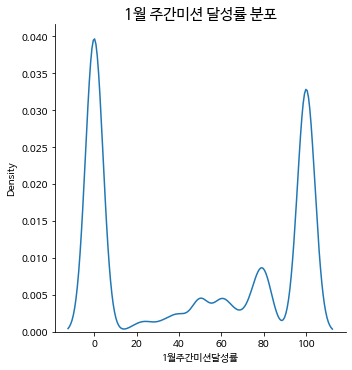

In [ ]:
sns.displot(ms_edit, x="1월주간미션달성률", kind="kde")
plt.title('1월 주간미션 달성률 분포', fontsize = 15)

Text(0, 0.5, 'Count')

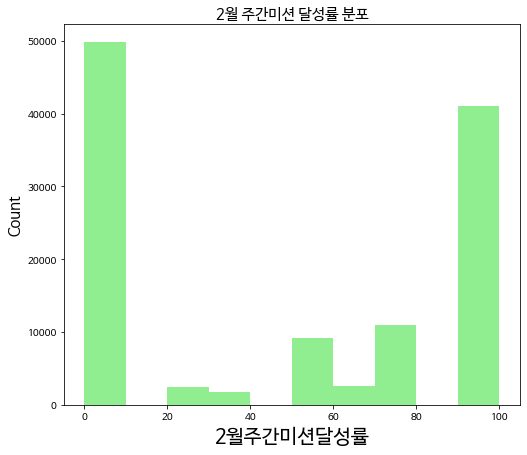

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
plt.hist(ms_edit['2월주간미션달성률'], color = 'lightgreen')
plt.title('2월 주간미션 달성률 분포',fontsize = 15)
plt.xlabel('2월주간미션달성률', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

###3.고객별 총 참여횟수/달성 횟수(3개월)

###4.고객별 월 주간미션 획득 포인트

In [ ]:
ms_edit["주간미션포인트획득상태"].replace({"#": "0"}, inplace=True)
ms_edit['주간미션포인트획득상태']= ms_edit['주간미션포인트획득상태'].astype('int')
ms_edit['1월총주간미션획득포인트'] = ms_edit.groupby(['party_id'])['주간미션포인트획득상태'].transform('sum')
ms_edit

,Week,party_id,goal_id,주간미션시작일,주간미션상태,주간미션목표포인트,주간미션목표상태,주간미션포인트획득상태,주간미션성공일,미션종료기한일,주간미션상태변경일,주간미션연동일,1월주간미션참여횟수,1월주간미션참여률,주간미션달성여부,1월주간미션달성횟수,1월주간미션달성률,1월총주간미션획득포인트
0,1,4638477,1275631105,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210103,20210103,5,100.0,1.0,5.0,100.0,2500
1,1,9514492,1274142502,20201228,Not Achieved,200,Goal Not Achieved,0,20210103,20210103,20201224,20201224,2,40.0,nan,0.0,0.0,200
2,1,11735495,1275569205,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,5,100.0,1.0,5.0,100.0,2500
3,1,22328999,1275397077,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210101,20210101,5,100.0,1.0,5.0,100.0,2500
4,1,27987988,1275663097,20201228,Achieved,500,Achieved Goal,500,20210103,20210103,20210102,20210102,5,100.0,1.0,5.0,100.0,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147934,5,1200247039,1284384137,20210125,Not Achieved,200,Pending Goal Tracker,0,20210131,20210131,20210121,20210121,3,60.0,nan,0.0,0.0,50
147935,5,1200273316,1283870562,20210125,Not Achieved,200,In Progress Goal Tracker,0,20210131,20210131,20210121,20210121,3,60.0,nan,0.0,0.0,200
147936,5,1200337530,#,#,#,#,#,0,#,#,#,#,1,20.0,nan,0.0,0.0,0
147937,5,201233206,1284037321,20210125,Not Achieved,300,In Progress Goal Tracker,0,20210131,20210131,20210121,20210121,5,100.0,nan,0.0,0.0,700


Text(0.5, 1.0, '11월 총 주간미션 획득포인트 분포')

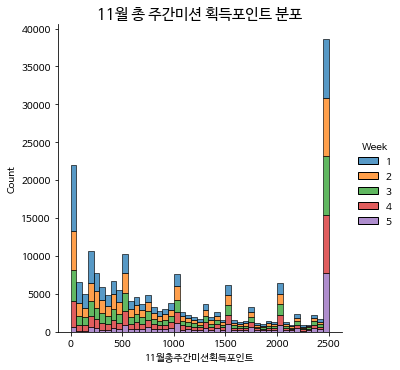

In [ ]:
sns.displot(ms_edit, x="11월총주간미션획득포인트", hue="Week", multiple="stack")
plt.title('11월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '12월 총 주간미션 획득포인트 분포')

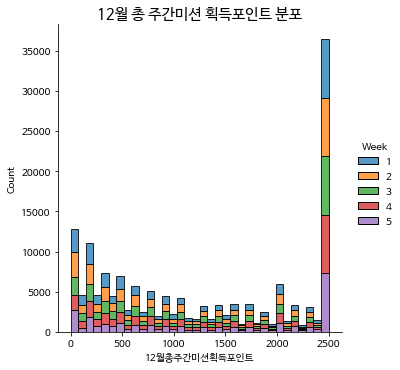

In [ ]:
sns.displot(ms_edit, x="12월총주간미션획득포인트", hue="Week", multiple="stack")
plt.title('12월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '1월 총 주간미션 획득포인트 분포')

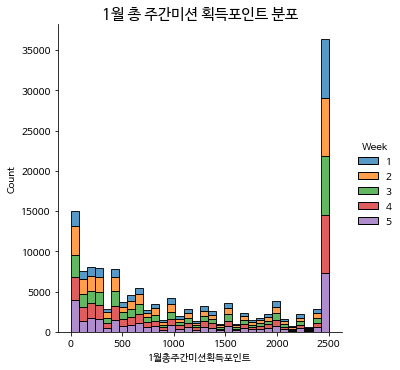

In [ ]:
sns.displot(ms_edit, x="1월총주간미션획득포인트", hue="Week", multiple="stack")
plt.title('1월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '2월 총 주간미션 획득포인트 분포')

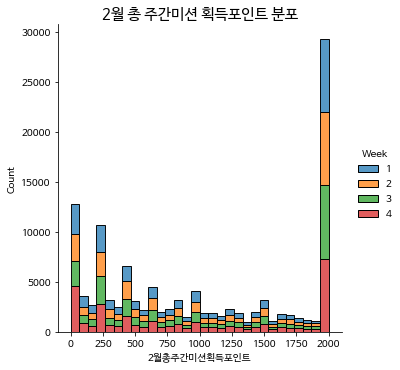

In [ ]:
sns.displot(ms_edit, x="2월총주간미션획득포인트", hue="Week", multiple="stack")
plt.title('2월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '11월 총 주간미션 획득포인트 분포')

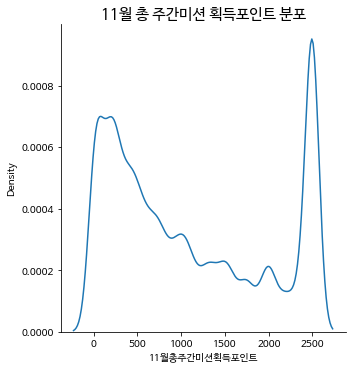

In [ ]:
sns.displot(ms_edit, x="11월총주간미션획득포인트", kind="kde")
plt.title('11월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '12월 총 주간미션 획득포인트 분포')

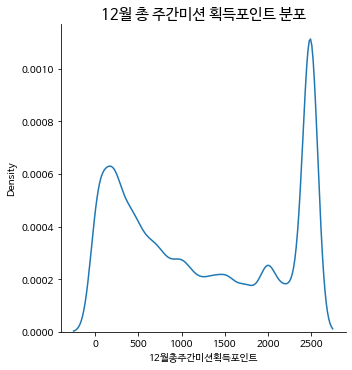

In [ ]:
sns.displot(ms_edit, x="12월총주간미션획득포인트", kind="kde")
plt.title('12월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '1월 총 주간미션 획득포인트 분포')

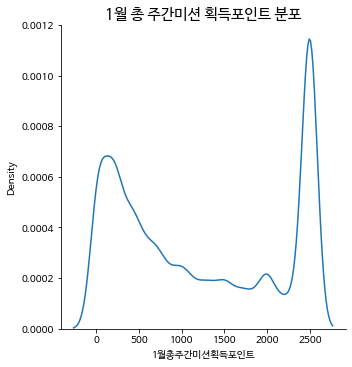

In [ ]:
sns.displot(ms_edit, x="1월총주간미션획득포인트", kind="kde")
plt.title('1월 총 주간미션 획득포인트 분포', fontsize = 15)

Text(0.5, 1.0, '2월 총 주간미션 획득포인트 분포')

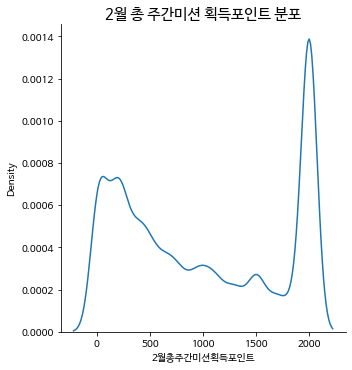

In [ ]:
sns.displot(ms_edit, x="2월총주간미션획득포인트", kind="kde")
plt.title('2월 총 주간미션 획득포인트 분포', fontsize = 15)

- 총주간 미션 획득 포인트는 월별 비슷한 분포
- 12월이 주간미션 참여률이 11월보다 낮지만 평균은 11월 평균보다 다소 높음

In [ ]:
ms_edit.describe()

,주간미션포인트획득상태,1월주간미션참여횟수,1월주간미션참여률,1월주간미션달성횟수,1월주간미션달성률,1월총주간미션획득포인트
count,147939.000000,147939.000000,147939.000000,147939.000000,147939.000000,147939.000000
mean,265.487464,4.001372,80.027444,2.250049,49.242712,1221.054624
std,201.257641,1.311708,26.234153,2.164980,44.521261,952.033044
min,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000
25%,50.000000,3.000000,60.000000,0.000000,0.000000,300.000000
50%,250.000000,5.000000,100.000000,2.000000,50.000000,1000.000000
75%,500.000000,5.000000,100.000000,5.000000,100.000000,2400.000000
max,500.000000,5.000000,100.000000,5.000000,100.000000,2500.000000


In [ ]:
ms_edit.describe() 

,주간미션포인트획득상태,12월주간미션참여횟수,12월주간미션참여률,12월주간미션달성횟수,12월주간미션달성률,12월총주간미션획득포인트
count,160995.000000,160995.000000,160995.000000,160995.000000,160995.000000,160995.000000
mean,269.350290,4.081239,81.624771,2.165049,46.932269,1243.133948
std,197.843465,1.314375,26.287510,2.174446,44.559548,929.272980
min,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000
25%,50.000000,3.000000,60.000000,0.000000,0.000000,350.000000
50%,250.000000,5.000000,100.000000,2.000000,50.000000,1050.000000
75%,500.000000,5.000000,100.000000,5.000000,100.000000,2300.000000
max,500.000000,5.000000,100.000000,5.000000,100.000000,2500.000000


In [ ]:
ms_edit.describe()

,주간미션포인트획득상태,1월주간미션참여횟수,1월주간미션참여률,1월주간미션달성횟수,1월주간미션달성률,1월총주간미션획득포인트
count,147939.000000,147939.000000,147939.000000,147939.000000,147939.000000,147939.000000
mean,265.487464,4.001372,80.027444,2.250049,49.242712,1221.054624
std,201.257641,1.311708,26.234153,2.164980,44.521261,952.033044
min,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000
25%,50.000000,3.000000,60.000000,0.000000,0.000000,300.000000
50%,250.000000,5.000000,100.000000,2.000000,50.000000,1000.000000
75%,500.000000,5.000000,100.000000,5.000000,100.000000,2400.000000
max,500.000000,5.000000,100.000000,5.000000,100.000000,2500.000000


In [ ]:
ms_edit.describe()

,주간미션포인트획득상태,2월주간미션참여횟수,2월주간미션참여률,2월주간미션달성횟수,2월주간미션달성률,2월총주간미션획득포인트
count,117623.000000,117623.000000,117623.000000,117623.000000,117623.000000,117623.000000
mean,262.308392,3.388904,84.722588,1.812877,48.196084,993.393724
std,199.002226,0.982166,24.554142,1.758389,44.810383,749.163687
min,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000
25%,50.000000,3.000000,75.000000,0.000000,0.000000,250.000000
50%,250.000000,4.000000,100.000000,2.000000,50.000000,850.000000
75%,500.000000,4.000000,100.000000,4.000000,100.000000,1900.000000
max,500.000000,4.000000,100.000000,4.000000,100.000000,2000.000000


- 고이용 고객군 기준?
1. 11월 주간미션참여횟수 : 5회
2. 11월 주간미션달성횟수 : 4회
3. 11월 주간미션 획득포인트 기준 : 2000


1. 12월 주간미션참여횟수 : 5회
2. 12월 주간미션달성횟수 : 5회
3. 12월 주간미션 획득포인트 기준 : 2300


1. 1월 주간미션참여횟수 : 5회
2. 1월 주간미션달성횟수 : 5회
3. 1월 주간미션 획득포인트 기준 : 2400

1. 2월 주간미션참여횟수 : 4회
2. 2월 주간미션달성횟수 : 4회
3. 2월 주간미션 획득포인트 기준 : 2000

In [ ]:
ms_edit.to_csv('mission_Feb.csv')

###5.고객별 주간미션 시작~달성 소요 일수

In [ ]:
mission_suc = ms_edit[ms_edit['주간미션상태']=='Achieved']

mission_suc = mission_suc[['party_id','goal_id','주간미션시작일','주간미션성공일','주간미션상태변경일','주간미션연동일','주간미션상태']]
mission_suc['주간미션시작일'] = pd.to_datetime(mission_suc['주간미션시작일'],format='%Y%m%d')
mission_suc['주간미션성공일'] = pd.to_datetime(mission_suc['주간미션성공일'],format='%Y%m%d')
mission_suc['주간미션상태변경일'] = pd.to_datetime(mission_suc['주간미션상태변경일'],format='%Y%m%d')
mission_suc['주간미션연동일'] = pd.to_datetime(mission_suc['주간미션연동일'],format='%Y%m%d')
mission_suc

,party_id,goal_id,주간미션시작일,주간미션성공일,주간미션상태변경일,주간미션연동일,주간미션상태
0,4638477,1275631105,2020-12-28,2021-01-03,2021-01-03,2021-01-03,Achieved
2,11735495,1275569205,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved
3,22328999,1275397077,2020-12-28,2021-01-03,2021-01-01,2021-01-01,Achieved
4,27987988,1275663097,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved
5,30062477,1275419585,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved
...,...,...,...,...,...,...,...
146897,200002222,1285032122,2021-01-25,2021-01-31,2021-02-03,2021-02-03,Achieved
146916,1200279575,1284126410,2021-01-25,2021-01-31,2021-02-02,2021-02-02,Achieved
146941,1200228248,1283621678,2021-01-25,2021-01-31,2021-01-31,2021-01-31,Achieved
146950,201276881,1283546504,2021-01-25,2021-01-31,2021-02-01,2021-02-01,Achieved


In [ ]:
mission_suc = mission_suc.drop_duplicates()
mission_suc # 121,424 => 91,312 => 87,316 => 67,846

,party_id,goal_id,주간미션시작일,주간미션성공일,주간미션상태변경일,주간미션연동일,주간미션상태
0,4638477,1275631105,2020-12-28,2021-01-03,2021-01-03,2021-01-03,Achieved
2,11735495,1275569205,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved
3,22328999,1275397077,2020-12-28,2021-01-03,2021-01-01,2021-01-01,Achieved
4,27987988,1275663097,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved
5,30062477,1275419585,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved
...,...,...,...,...,...,...,...
146897,200002222,1285032122,2021-01-25,2021-01-31,2021-02-03,2021-02-03,Achieved
146916,1200279575,1284126410,2021-01-25,2021-01-31,2021-02-02,2021-02-02,Achieved
146941,1200228248,1283621678,2021-01-25,2021-01-31,2021-01-31,2021-01-31,Achieved
146950,201276881,1283546504,2021-01-25,2021-01-31,2021-02-01,2021-02-01,Achieved


In [ ]:
mission_suc['주간미션성공소요일'] = mission_suc['주간미션상태변경일']-mission_suc['주간미션시작일']
mission_suc['주간미션성공소요일'].value_counts()

4 days     24888
5 days     21436
6 days     20797
7 days      6794
3 days      5159
2 days      2886
9 days      2503
8 days      2413
1 days       364
10 days       31
11 days       22
12 days       14
13 days        4
14 days        3
17 days        1
16 days        1
Name: 주간미션성공소요일, dtype: int64

In [ ]:
mission_suc.head()

,party_id,goal_id,주간미션시작일,주간미션성공일,주간미션상태변경일,주간미션연동일,주간미션상태,주간미션성공소요일
0,4638477,1275631105,2020-12-28,2021-01-03,2021-01-03,2021-01-03,Achieved,6 days
2,11735495,1275569205,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved,5 days
3,22328999,1275397077,2020-12-28,2021-01-03,2021-01-01,2021-01-01,Achieved,4 days
4,27987988,1275663097,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved,5 days
5,30062477,1275419585,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved,5 days


In [ ]:
mission_suc = mission_suc[mission_suc['주간미션성공소요일'] <'11 days']
mission_suc['주간미션성공소요일'].value_counts() # => 나중에 성연령?

4 days     24888
5 days     21436
6 days     20797
7 days      6794
3 days      5159
2 days      2886
9 days      2503
8 days      2413
1 days       364
10 days       31
Name: 주간미션성공소요일, dtype: int64

Text(0.5, 1.0, '11월 미션성공 소요일 분포')

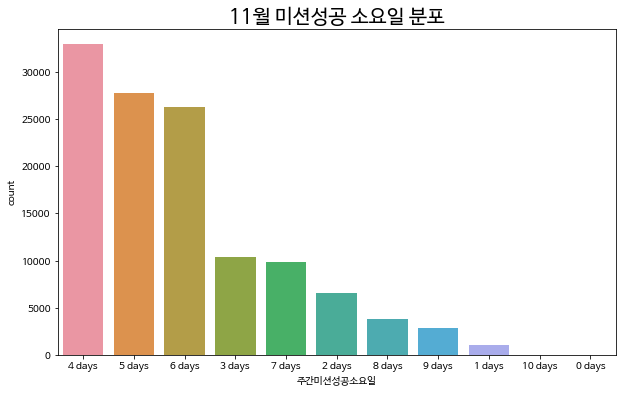

In [ ]:
mission_suc['주간미션성공소요일'] = mission_suc['주간미션성공소요일'].astype('str')
plt.figure(figsize=(10, 6))
sns.countplot(x="주간미션성공소요일", data = mission_suc, order = mission_suc['주간미션성공소요일'].value_counts().index)
plt.title('11월 미션성공 소요일 분포', fontsize = 20)

Text(0.5, 1.0, '12월 미션성공 소요일 분포')

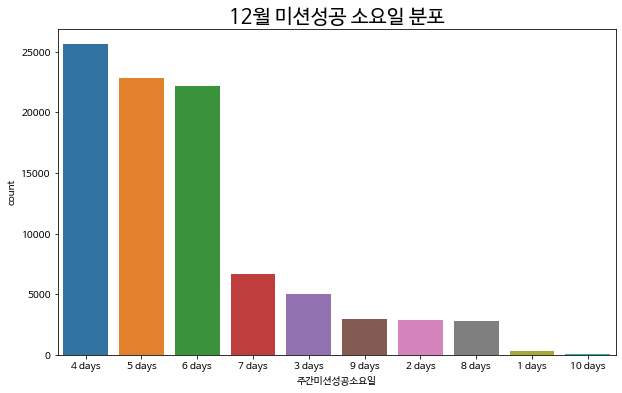

In [ ]:
mission_suc['주간미션성공소요일'] = mission_suc['주간미션성공소요일'].astype('str')
plt.figure(figsize=(10, 6))
sns.countplot(x="주간미션성공소요일", data = mission_suc, order = mission_suc['주간미션성공소요일'].value_counts().index)
plt.title('12월 미션성공 소요일 분포', fontsize = 20)

Text(0.5, 1.0, '1월 미션성공 소요일 분포')

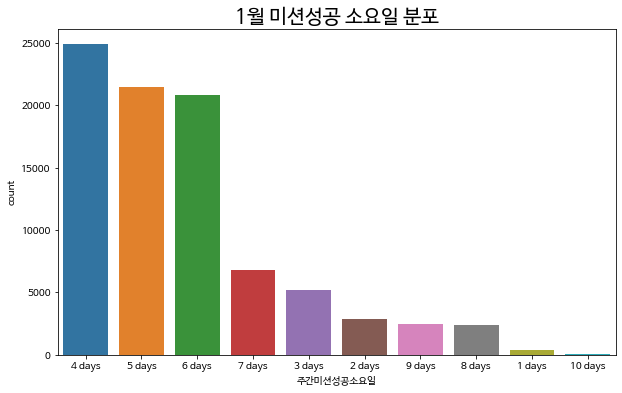

In [ ]:
mission_suc['주간미션성공소요일'] = mission_suc['주간미션성공소요일'].astype('str')
plt.figure(figsize=(10, 6))
sns.countplot(x="주간미션성공소요일", data = mission_suc, order = mission_suc['주간미션성공소요일'].value_counts().index)
plt.title('1월 미션성공 소요일 분포', fontsize = 20)

Text(0.5, 1.0, '2월 미션성공 소요일 분포')

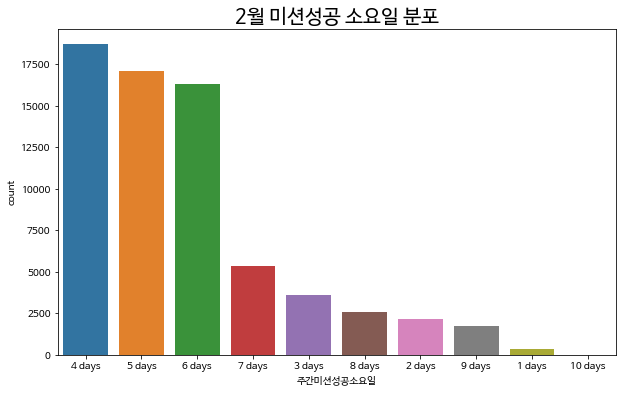

In [ ]:
mission_suc['주간미션성공소요일'] = mission_suc['주간미션성공소요일'].astype('str')
plt.figure(figsize=(10, 6))
sns.countplot(x="주간미션성공소요일", data = mission_suc, order = mission_suc['주간미션성공소요일'].value_counts().index)
plt.title('2월 미션성공 소요일 분포', fontsize = 20)

###6.주차별/요일별 주간미션 참여 행태

In [ ]:
# 주차별 주간미션 참여
ms_edit = ms_edit[ms_edit['주간미션상태']!='#']
ms_edit = ms_edit.drop_duplicates()
ms_week = pd.DataFrame(ms_edit.groupby('Week')['주간미션상태'].value_counts())
ms_week

주간미션상태
Week 주간미션상태              
1    Achieved       15524
     Not Achieved    8455
2    Achieved       17619
     Not Achieved   13998
3    Achieved       18160
     Not Achieved   11774
4    Achieved       18254
     Not Achieved   12117
5    Achieved       17759
     Not Achieved   11969

Text(0.5, 1.0, '11월 주차별 미션성공여부 분포')

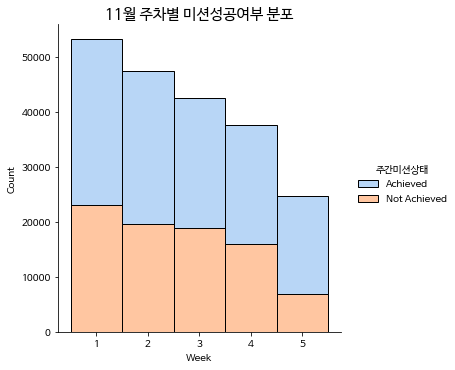

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="stack", palette = 'pastel')
plt.title('11월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '12월 주차별 미션성공여부 분포')

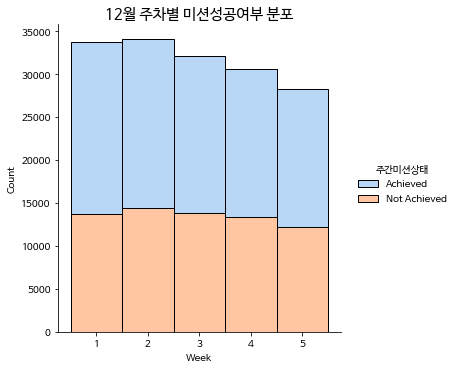

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="stack", palette = 'pastel')
plt.title('12월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '1월 주차별 미션성공여부 분포')

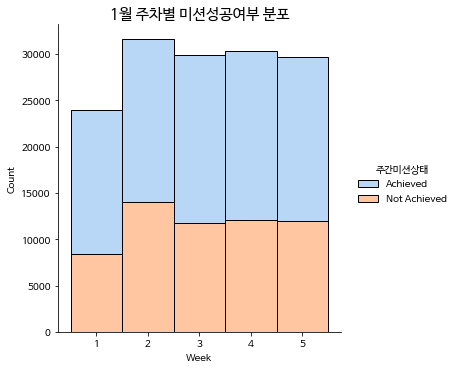

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="stack", palette = 'pastel')
plt.title('1월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '2월 주차별 미션성공여부 분포')

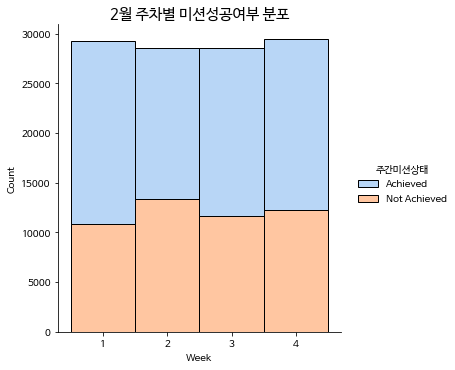

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="stack", palette = 'pastel')
plt.title('2월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '11월 주차별 미션성공여부 분포')

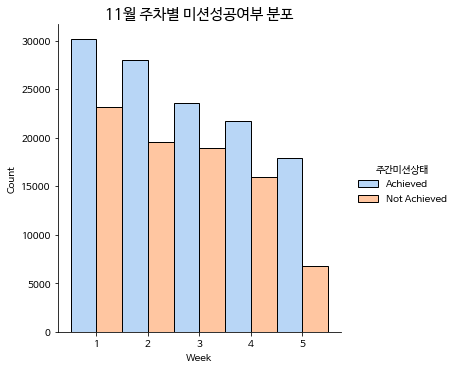

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="dodge", palette = 'pastel')
plt.title('11월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '12월 주차별 미션성공여부 분포')

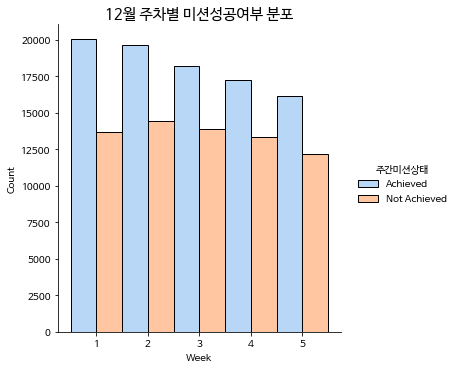

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="dodge", palette = 'pastel')
plt.title('12월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '1월 주차별 미션성공여부 분포')

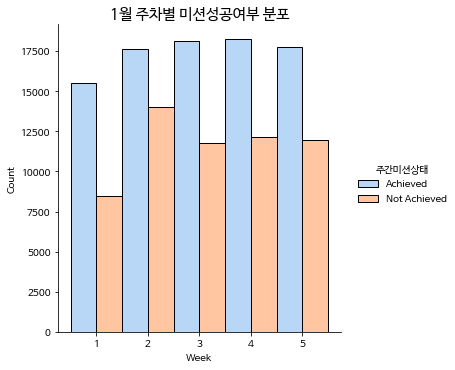

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="dodge", palette = 'pastel')
plt.title('1월 주차별 미션성공여부 분포', fontsize = 15)

Text(0.5, 1.0, '2월 주차별 미션성공여부 분포')

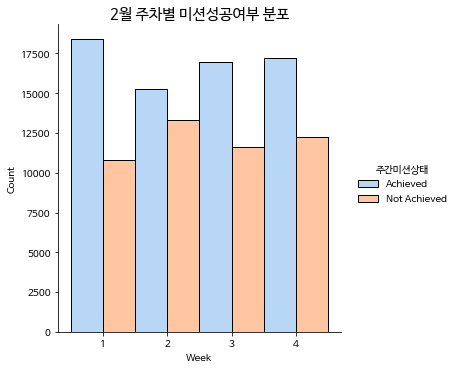

In [ ]:
sns.displot(ms_edit, x="Week", hue="주간미션상태", multiple="dodge", palette = 'pastel')
plt.title('2월 주차별 미션성공여부 분포', fontsize=15)

In [ ]:
# 요일 추가
mission_suc['day_of_week_suc'] = mission_suc['주간미션상태변경일'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

mission_suc['day_of_week_suc'] = mission_suc['day_of_week_suc'].apply(lambda x: days[x])

In [ ]:
mission_suc.head(1)

,party_id,goal_id,주간미션시작일,주간미션성공일,주간미션상태변경일,주간미션연동일,주간미션상태,주간미션성공소요일,day_of_week_suc
0,4638477,1275631105,2020-12-28,2021-01-03,2021-01-03,2021-01-03,Achieved,6 days,Sun


Text(0.5, 1.0, '11월 미션달성성공 요일 분포')

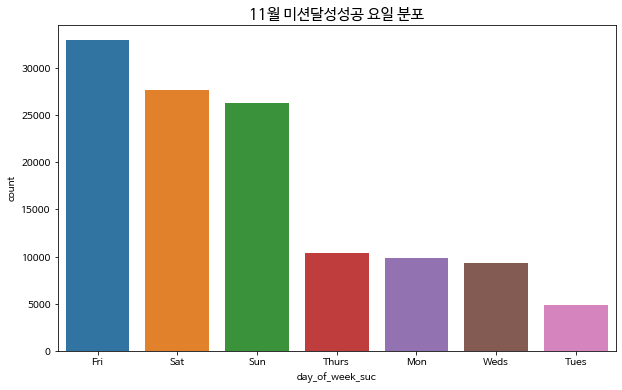

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week_suc", data=mission_suc, order = mission_suc['day_of_week_suc'].value_counts().index)
plt.title('11월 미션달성성공 요일 분포', fontsize = 15)

Text(0.5, 1.0, '12월 미션달성성공 요일 분포')

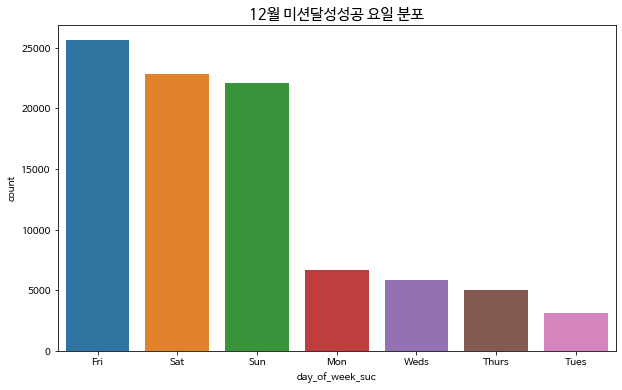

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week_suc", data=mission_suc, order = mission_suc['day_of_week_suc'].value_counts().index)
plt.title('12월 미션달성성공 요일 분포', fontsize = 15)

Text(0.5, 1.0, '1월 미션달성성공 요일 분포')

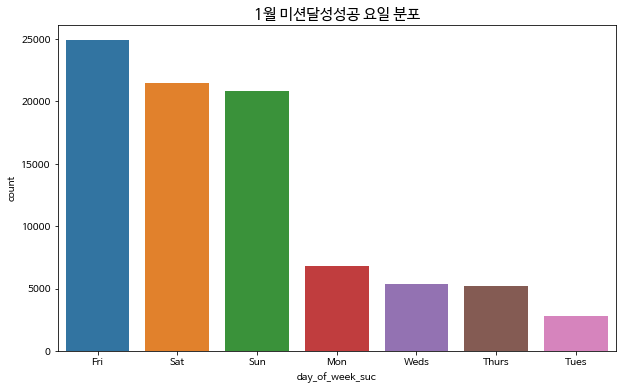

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week_suc", data=mission_suc, order = mission_suc['day_of_week_suc'].value_counts().index)
plt.title('1월 미션달성성공 요일 분포', fontsize = 15)

Text(0.5, 1.0, '2월 미션달성성공 요일 분포')

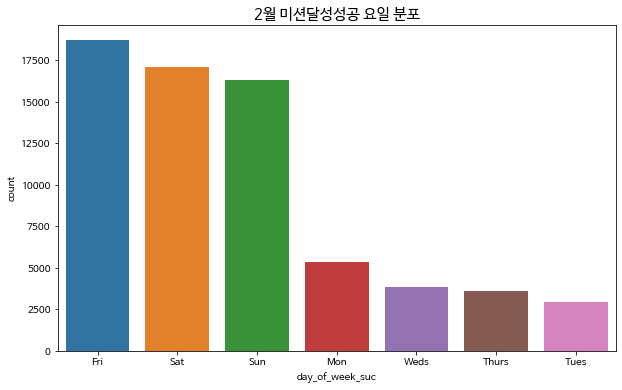

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week_suc", data=mission_suc, order = mission_suc['day_of_week_suc'].value_counts().index)
plt.title('2월 미션달성성공 요일 분포', fontsize = 15)

In [ ]:
mission_suc.head()

,party_id,goal_id,주간미션시작일,주간미션성공일,주간미션상태변경일,주간미션연동일,주간미션상태,주간미션성공소요일,day_of_week_suc
0,4638477,1275631105,2020-12-28,2021-01-03,2021-01-03,2021-01-03,Achieved,6 days,Sun
2,11735495,1275569205,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved,5 days,Sat
3,22328999,1275397077,2020-12-28,2021-01-03,2021-01-01,2021-01-01,Achieved,4 days,Fri
4,27987988,1275663097,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved,5 days,Sat
5,30062477,1275419585,2020-12-28,2021-01-03,2021-01-02,2021-01-02,Achieved,5 days,Sat


In [ ]:
mission_suc.to_csv('mission_suc_Feb.csv')

## 이벤트 분석항목
1. 월별/주차별/일별  평균 활동 수 (걸음수/거리/심박수)
2. 요일별/주차별 전체 활동 수
3. 성연령별 활동 수 
4. 활동 시 연동 디바이스
5. 월별 총 획득포인트, 3개월 총 획득포인트, 월 평균 획득포인트


###1.월별/주차/일별 활동 수(걸음수/거리/심박수)

In [ ]:
# 활동별로 파일 쪼개기
event = df1[['dt','Week','day_of_week','party_id','event_id','이벤트타입명', '활동수', '이벤트동기화일', '활동구분', '포인트반영일', '획득포인트',
       '포인트발생일', '포인트획득사유유형', '포인트획득사유', '디바이스제조사명']]
event = event.drop_duplicates()
event # 933,133 => 12월 : 851,963 => 1월 : 1,091,213 => 2월 : 987,857 

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명
0,2021-01-01,1,Fri,4638477,8678863555,Total Steps,8096,2021-01-02,Steps,20210102,50,20210101,Conditions,You earned the maximum points available for th...,S Health Third-party
1,2021-01-01,1,Fri,4638477,8678863555,Distance,7,2021-01-02,#,#,#,#,#,#,S Health Third-party
2,2021-01-01,1,Fri,9514492,8687562313,Distance,11,2021-01-07,#,#,#,#,#,#,#
3,2021-01-01,1,Fri,9514492,8687562313,Total Steps,10032,2021-01-07,Steps,20210107,50,20210101,Conditions,You earned the maximum points available for th...,#
4,2021-01-01,1,Fri,11735495,8678816802,Total Steps,13069,2021-01-02,Steps,20210102,100,20210101,Conditions,You earned the maximum points available for th...,S Health Third-party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091208,2021-01-31,5,Sun,1200316869,8725844503,Distance,16,2021-02-02,#,#,#,#,#,#,S Health Third-party
1091209,2021-01-31,5,Sun,1200322614,8725839061,Distance,15,2021-02-01,#,#,#,#,#,#,#
1091210,2021-01-31,5,Sun,1200322614,8725839061,Total Steps,20432,2021-02-01,Steps,20210201,100,20210131,Conditions,You earned the maximum points available for th...,#
1091211,2021-01-31,5,Sun,1200328368,8724386650,Total Steps,13344,2021-01-31,Steps,20210131,100,20210131,Conditions,You earned the maximum points available for th...,#


In [ ]:
event['이벤트타입명'].value_counts()

Total Steps           585225
Distance              478908
Average Heart Rate     27080
Name: 이벤트타입명, dtype: int64

In [ ]:
event_steps=event[event['이벤트타입명']=='Total Steps']
event_steps['1월활동수_steps'] = event_steps.groupby(['party_id'])['활동수'].transform('sum')
event_steps['1월주차별_steps'] = event_steps.groupby(['party_id','Week'])['활동수'].transform('sum')
event_steps['1월일별_steps'] = event_steps.groupby(['party_id','dt'])['활동수'].transform('sum')
event_steps

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명,1월활동수_steps,1월주차별_steps,1월일별_steps
0,2021-01-01,1,Fri,4638477,8678863555,Total Steps,8096,2021-01-02,Steps,20210102,50,20210101,Conditions,You earned the maximum points available for th...,S Health Third-party,284399,15701,8096
3,2021-01-01,1,Fri,9514492,8687562313,Total Steps,10032,2021-01-07,Steps,20210107,50,20210101,Conditions,You earned the maximum points available for th...,#,70934,30485,10032
4,2021-01-01,1,Fri,11735495,8678816802,Total Steps,13069,2021-01-02,Steps,20210102,100,20210101,Conditions,You earned the maximum points available for th...,S Health Third-party,333059,27625,13069
7,2021-01-01,1,Fri,22328999,8678253658,Total Steps,12590,2021-01-01,Steps,20210101,100,20210101,Conditions,You earned the maximum points available for th...,#,444983,46406,12590
8,2021-01-01,1,Fri,27987988,8679213079,Total Steps,13928,2021-01-02,Steps,20210102,100,20210101,Conditions,You earned the maximum points available for th...,#,489894,13928,13928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091203,2021-01-31,5,Sun,1200273962,8724595571,Total Steps,10128,2021-01-31,Steps,20210131,50,20210131,Conditions,You earned the maximum points available for th...,#,333857,80951,10128
1091205,2021-01-31,5,Sun,1200277269,8726499567,Total Steps,21023,2021-02-02,Steps,20210202,100,20210131,Conditions,You earned the maximum points available for th...,#,492015,125307,21023
1091207,2021-01-31,5,Sun,1200316869,8725844503,Total Steps,10492,2021-02-02,Steps,20210202,50,20210131,Conditions,You earned the maximum points available for th...,S Health Third-party,295643,86872,10492
1091210,2021-01-31,5,Sun,1200322614,8725839061,Total Steps,20432,2021-02-01,Steps,20210201,100,20210131,Conditions,You earned the maximum points available for th...,#,475002,223101,20432


Text(0.5, 1.0, '11월 총 걸음수 분포')

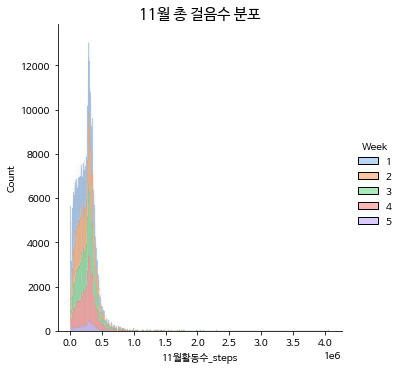

In [ ]:
sns.displot(event_steps, x="11월활동수_steps", hue="Week", multiple="stack", palette = 'pastel')
plt.title('11월 총 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '12월 총 걸음수 분포')

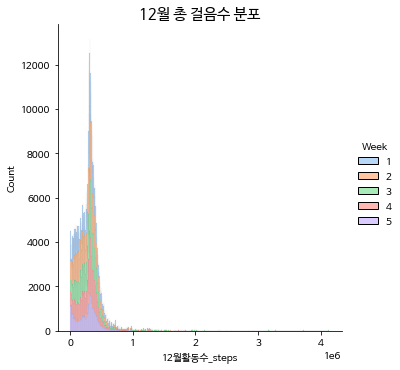

In [ ]:
sns.displot(event_steps, x="12월활동수_steps", hue="Week", multiple="stack", palette = 'pastel')
plt.title('12월 총 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '1월 총 걸음수 분포')

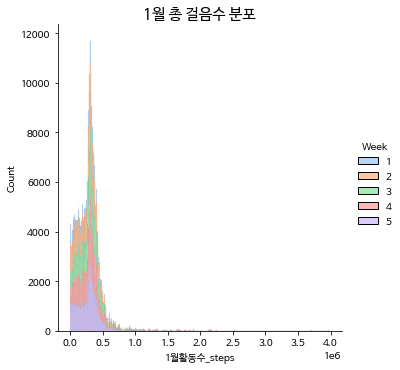

In [ ]:
sns.displot(event_steps, x="1월활동수_steps", hue="Week", multiple="stack", palette = 'pastel')
plt.title('1월 총 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '2월 총 걸음수 분포')

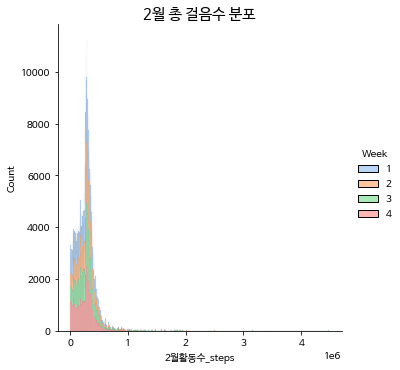

In [ ]:
sns.displot(event_steps, x="2월활동수_steps", hue="Week", multiple="stack", palette = 'pastel')
plt.title('2월 총 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '11월 주차별 걸음수 분포')

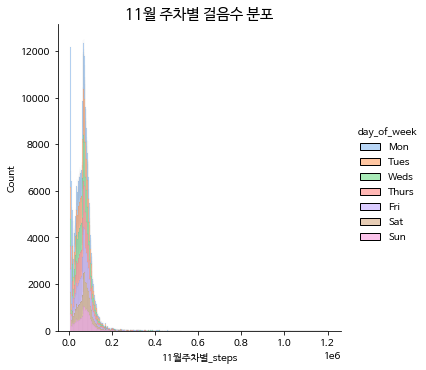

In [ ]:
sns.displot(event_steps, x="11월주차별_steps", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('11월 주차별 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '12월 주차별 걸음수 분포')

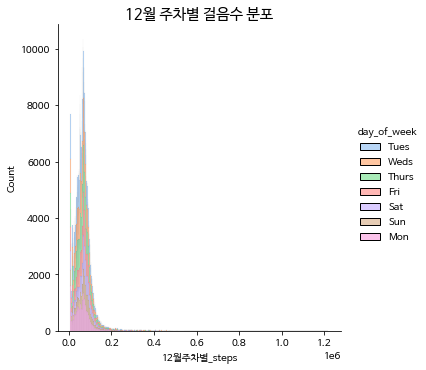

In [ ]:
sns.displot(event_steps, x="12월주차별_steps", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('12월 주차별 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '1월 주차별 걸음수 분포')

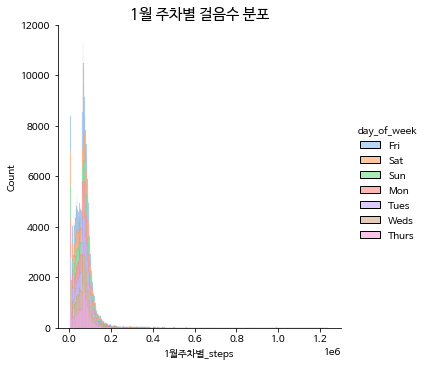

In [ ]:
sns.displot(event_steps, x="1월주차별_steps", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('1월 주차별 걸음수 분포', fontsize = 15)

Text(0.5, 1.0, '2월 주차별 걸음수 분포')

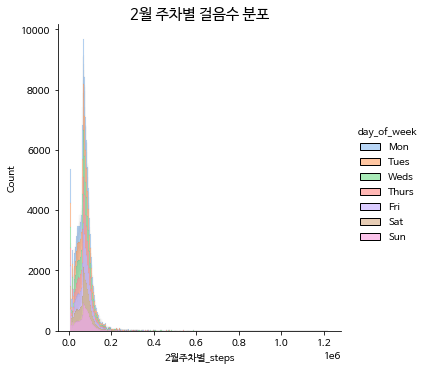

In [ ]:
sns.displot(event_steps, x="2월주차별_steps", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('2월 주차별 걸음수 분포', fontsize = 15)

In [ ]:
event_steps['event_id']=event_steps['event_id'].astype('str')
event_steps['party_id']=event_steps['party_id'].astype('str')
event_steps['Week']=event_steps['Week'].astype('str')
event_steps.describe()

,활동수,1월활동수_steps,1월주차별_steps,1월일별_steps
count,585225.000000,5.852250e+05,5.852250e+05,585225.000000
mean,13449.026489,2.934056e+05,7.099514e+04,13449.026489
std,7399.547877,2.054948e+05,4.707467e+04,7399.547877
min,7500.000000,7.500000e+03,7.500000e+03,7500.000000
25%,9643.000000,1.694130e+05,4.402300e+04,9643.000000
50%,12618.000000,2.940030e+05,6.888000e+04,12618.000000
75%,14463.000000,3.687590e+05,8.653100e+04,14463.000000
max,286971.000000,3.970013e+06,1.239522e+06,286971.000000


- 11월 평균 월 활동 걸음수 : 259895.8
- 11월 평균 주 활동 걸음수 : 68975.5
- 11월 평균 일 활동 걸음수 : 13066.9



- 12월 평균 월 활동 걸음수 : 294900.5
- 12월 평균 주 활동 걸음수 : 68084.1
- 12월 평균 일 활동 걸음수 : 13386.6


- 1월 평균 월 활동 걸음수 : 293405.6
- 1월 평균 주 활동 걸음수 : 70995.1
- 1월 평균 일 활동 걸음수 : 13449.0

In [ ]:
print('11월 평균 월 활동 걸음수 : ',round(event_steps['11월활동수_steps'].mean(),1))
print('11월 평균 주 활동 걸음수 : ',round(event_steps['11월주차별_steps'].mean(),1))
print('11월 평균 일 활동 걸음수 : ',round(event_steps['11월일별_steps'].mean(),1))

11월 평균 월 활동 걸음수 :  259895.8
11월 평균 주 활동 걸음수 :  68975.6
11월 평균 일 활동 걸음수 :  13066.9


In [ ]:
print('12월 평균 월 활동 걸음수 : ',round(event_steps['12월활동수_steps'].mean(),1))
print('12월 평균 주 활동 걸음수 : ',round(event_steps['12월주차별_steps'].mean(),1))
print('12월 평균 일 활동 걸음수 : ',round(event_steps['12월일별_steps'].mean(),1))

12월 평균 월 활동 걸음수 :  294900.5
12월 평균 주 활동 걸음수 :  68084.1
12월 평균 일 활동 걸음수 :  13386.6


In [ ]:
print('1월 평균 월 활동 걸음수 : ',round(event_steps['1월활동수_steps'].mean(),1))
print('1월 평균 주 활동 걸음수 : ',round(event_steps['1월주차별_steps'].mean(),1))
print('1월 평균 일 활동 걸음수 : ',round(event_steps['1월일별_steps'].mean(),1))

1월 평균 월 활동 걸음수 :  293405.6
1월 평균 주 활동 걸음수 :  70995.1
1월 평균 일 활동 걸음수 :  13449.0


In [ ]:
print('2월 평균 월 활동 걸음수 : ',round(event_steps['2월활동수_steps'].mean(),1))
print('2월 평균 주 활동 걸음수 : ',round(event_steps['2월주차별_steps'].mean(),1))
print('2월 평균 일 활동 걸음수 : ',round(event_steps['2월일별_steps'].mean(),1))

2월 평균 월 활동 걸음수 :  275433.6
2월 평균 주 활동 걸음수 :  75708.7
2월 평균 일 활동 걸음수 :  13557.9


In [ ]:
print('11월 평균 월 활동 걸음수 : ',round(event_steps['11월활동수_steps'].median(),1))
print('11월 평균 주 활동 걸음수 : ',round(event_steps['11월주차별_steps'].median(),1))
print('11월 평균 일 활동 걸음수 : ',round(event_steps['11월일별_steps'].median(),1))

11월 평균 월 활동 걸음수 :  260786.0
11월 평균 주 활동 걸음수 :  67894.0
11월 평균 일 활동 걸음수 :  12567.0


In [ ]:
print('12월 평균 월 활동 걸음수 : ',round(event_steps['12월활동수_steps'].median(),1))
print('12월 평균 주 활동 걸음수 : ',round(event_steps['12월주차별_steps'].median(),1))
print('12월 평균 일 활동 걸음수 : ',round(event_steps['12월일별_steps'].median(),1))

12월 평균 월 활동 걸음수 :  300972.0
12월 평균 주 활동 걸음수 :  65366.0
12월 평균 일 활동 걸음수 :  12631.0


In [ ]:
print('1월 평균 월 활동 걸음수 : ',round(event_steps['1월활동수_steps'].median(),1))
print('1월 평균 주 활동 걸음수 : ',round(event_steps['1월주차별_steps'].median(),1))
print('1월 평균 일 활동 걸음수 : ',round(event_steps['1월일별_steps'].median(),1))

1월 평균 월 활동 걸음수 :  294003.0
1월 평균 주 활동 걸음수 :  68880.0
1월 평균 일 활동 걸음수 :  12618.0


In [ ]:
# 거리
event_dist=event[event['이벤트타입명']=='Distance']
event_dist['1월활동수_dist'] = event_dist.groupby(['party_id'])['활동수'].transform('sum')
event_dist['1월주차별_dist'] = event_dist.groupby(['party_id','Week'])['활동수'].transform('sum')
event_dist['1월일별_dist'] = event_dist.groupby(['party_id','dt'])['활동수'].transform('sum')
event_dist.head()

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명,1월활동수_dist,1월주차별_dist,1월일별_dist
1,2021-01-01,1,Fri,4638477,8678863555,Distance,7,2021-01-02,#,#,#,#,#,#,S Health Third-party,249,13,7
2,2021-01-01,1,Fri,9514492,8687562313,Distance,11,2021-01-07,#,#,#,#,#,#,#,75,32,11
5,2021-01-01,1,Fri,11735495,8678816802,Distance,11,2021-01-02,#,#,#,#,#,#,S Health Third-party,266,23,11
6,2021-01-01,1,Fri,22328999,8678253658,Distance,10,2021-01-01,#,#,#,#,#,#,#,395,48,10
9,2021-01-01,1,Fri,27987988,8679213079,Distance,9,2021-01-02,#,#,#,#,#,#,#,328,9,9


Text(0.5, 1.0, '11월 총 거리 분포')

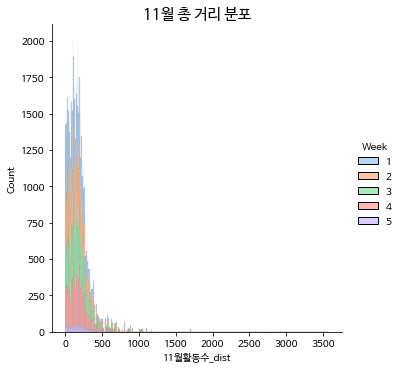

In [ ]:
sns.displot(event_dist, x="11월활동수_dist", hue="Week", multiple="stack", palette = 'pastel')
plt.title('11월 총 거리 분포', fontsize=15)

Text(0.5, 1.0, '12월 총 거리 분포')

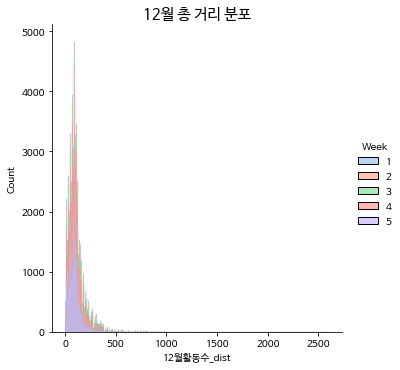

In [ ]:
sns.displot(event_dist, x="12월활동수_dist", hue="Week", multiple="stack", palette = 'pastel')
plt.title('12월 총 거리 분포', fontsize=15)

Text(0.5, 1.0, '1월 총 거리 분포')

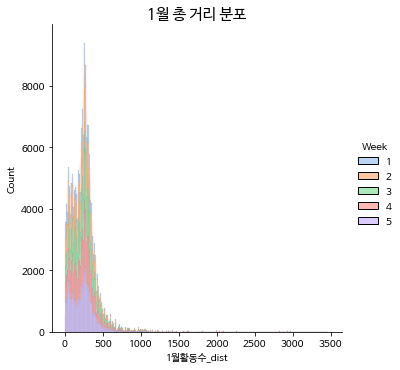

In [ ]:
sns.displot(event_dist, x="1월활동수_dist", hue="Week", multiple="stack", palette = 'pastel')
plt.title('1월 총 거리 분포', fontsize=15)

Text(0.5, 1.0, '2월 총 거리 분포')

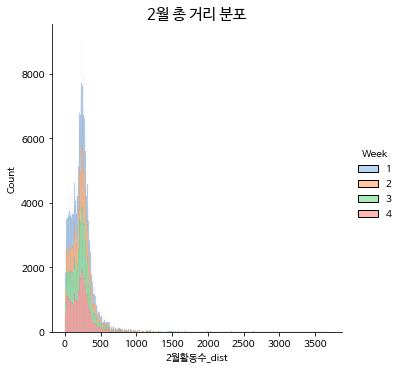

In [ ]:
sns.displot(event_dist, x="2월활동수_dist", hue="Week", multiple="stack", palette = 'pastel')
plt.title('2월 총 거리 분포', fontsize=15)

Text(0.5, 1.0, '11월 주차별 분포')

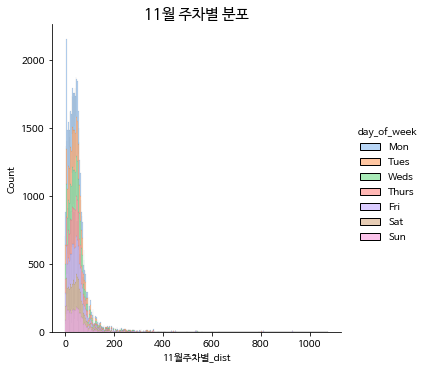

In [ ]:
sns.displot(event_dist, x="11월주차별_dist", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('11월 주차별 분포', fontsize=15)

Text(0.5, 1.0, '12월 주차별 분포')

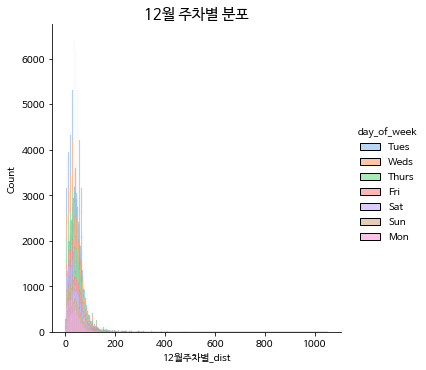

In [ ]:
sns.displot(event_dist, x="12월주차별_dist", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('12월 주차별 분포', fontsize=15)

Text(0.5, 1.0, '1월 주차별 분포')

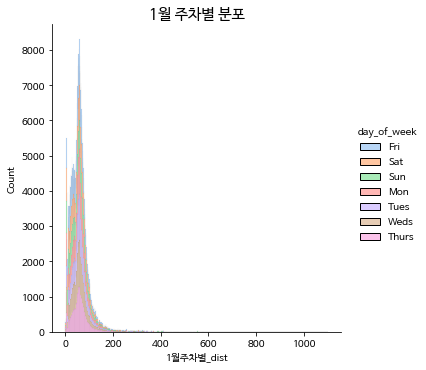

In [ ]:
sns.displot(event_dist, x="1월주차별_dist", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('1월 주차별 분포', fontsize=15)

Text(0.5, 1.0, '2월 주차별 분포')

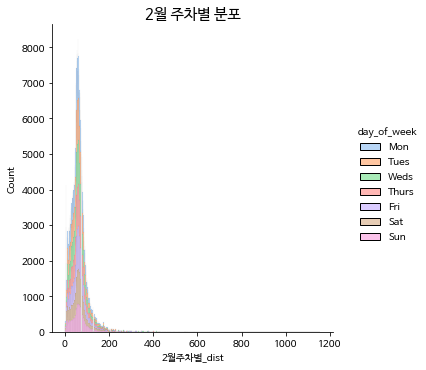

In [ ]:
sns.displot(event_dist, x="2월주차별_dist", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('2월 주차별 분포', fontsize=15)

In [ ]:
event_dist['event_id']=event_dist['event_id'].astype('str')
event_dist['party_id']=event_dist['party_id'].astype('str')
event_dist['Week']=event_dist['Week'].astype('str')
event_dist.describe()

,활동수,1월활동수_dist,1월주차별_dist,1월일별_dist
count,478908.000000,478908.000000,478908.000000,478908.000000
mean,11.324601,249.933449,60.649766,11.324601
std,7.021895,187.029086,42.832008,7.021895
min,0.000000,0.000000,0.000000,0.000000
25%,8.000000,131.000000,35.000000,8.000000
50%,10.000000,240.000000,57.000000,10.000000
75%,13.000000,317.000000,74.000000,13.000000
max,304.000000,3471.000000,1101.000000,304.000000


In [ ]:
event_dist['11월활동수_dist'].median()

156.0

In [ ]:
event_dist['12월활동수_dist'].median()

93.0

In [ ]:
event_dist['1월활동수_dist'].median()

240.0

In [ ]:
event_dist['2월활동수_dist'].median()

228.0

In [ ]:
print('11월 평균 월 활동 거리 : ', round(event_dist['11월활동수_dist'].mean(),1))
print('11월 평균 주 활동 거리 : ', round(event_dist['11월주차별_dist'].mean(),1))
print('11월 평균 일 활동 거리 : ', round(event_dist['11월일별_dist'].mean(),1))

11월 평균 월 활동 거리 :  179.9
11월 평균 주 활동 거리 :  47.6
11월 평균 일 활동 거리 :  10.3


In [ ]:
print('12월 평균 월 활동 거리 : ', round(event_dist['12월활동수_dist'].mean(),1))
print('12월 평균 주 활동 거리 : ', round(event_dist['12월주차별_dist'].mean(),1))
print('12월 평균 일 활동 거리 : ', round(event_dist['12월일별_dist'].mean(),1))

12월 평균 월 활동 거리 :  113.5
12월 평균 주 활동 거리 :  47.9
12월 평균 일 활동 거리 :  11.1


In [ ]:
print('1월 평균 월 활동 거리 : ', round(event_dist['1월활동수_dist'].mean(),1))
print('1월 평균 주 활동 거리 : ', round(event_dist['1월주차별_dist'].mean(),1))
print('1월 평균 일 활동 거리 : ', round(event_dist['1월일별_dist'].mean(),1))

1월 평균 월 활동 거리 :  249.9
1월 평균 주 활동 거리 :  60.6
1월 평균 일 활동 거리 :  11.3


In [ ]:
print('2월 평균 월 활동 거리 : ', round(event_dist['2월활동수_dist'].mean(),1))
print('2월 평균 주 활동 거리 : ', round(event_dist['2월주차별_dist'].mean(),1))
print('2월 평균 일 활동 거리 : ', round(event_dist['2월일별_dist'].mean(),1))

2월 평균 월 활동 거리 :  236.7
2월 평균 주 활동 거리 :  64.5
2월 평균 일 활동 거리 :  11.4


In [ ]:
print('11월 평균 월 활동 거리 : ', round(event_dist['11월활동수_dist'].median(),1))
print('11월 평균 주 활동 거리 : ', round(event_dist['11월주차별_dist'].median(),1))
print('11월 평균 일 활동 거리 : ', round(event_dist['11월일별_dist'].median(),1))

11월 평균 월 활동 거리 :  156.0
11월 평균 주 활동 거리 :  40.0
11월 평균 일 활동 거리 :  8.0


In [ ]:
print('12월 평균 월 활동 거리 : ', round(event_dist['12월활동수_dist'].median(),1))
print('12월 평균 주 활동 거리 : ', round(event_dist['12월주차별_dist'].median(),1))
print('12월 평균 일 활동 거리 : ', round(event_dist['12월일별_dist'].median(),1))

12월 평균 월 활동 거리 :  93.0
12월 평균 주 활동 거리 :  42.0
12월 평균 일 활동 거리 :  10.0


In [ ]:
print('1월 평균 월 활동 거리 : ', round(event_dist['1월활동수_dist'].median(),1))
print('1월 평균 주 활동 거리 : ', round(event_dist['1월주차별_dist'].median(),1))
print('1월 평균 일 활동 거리 : ', round(event_dist['1월일별_dist'].median(),1))

1월 평균 월 활동 거리 :  240.0
1월 평균 주 활동 거리 :  57.0
1월 평균 일 활동 거리 :  10.0


In [ ]:
print('2월 평균 월 활동 거리 : ', round(event_dist['2월활동수_dist'].median(),1))
print('2월 평균 주 활동 거리 : ', round(event_dist['2월주차별_dist'].median(),1))
print('2월 평균 일 활동 거리 : ', round(event_dist['2월일별_dist'].median(),1))

2월 평균 월 활동 거리 :  228.0
2월 평균 주 활동 거리 :  60.0
2월 평균 일 활동 거리 :  10.0


- 11월 월 평균 활동 거리 : 179.87
- 11월 주 평균 활동 거리 : 47.6
- 11월 일 평균 활동 거리 : 10.25


- 12월 월 평균 활동 거리 : 113.53
- 12월 주 평균 활동 거리 : 47.94
- 12월 일 평균 활동 거리 : 11.08

In [ ]:
# 심박수
event_heart=event[event['이벤트타입명']=='Average Heart Rate']
event_heart['1월활동수_hr'] = event_heart.groupby(['party_id'])['활동수'].transform('sum')
event_heart['1월주차별_hr'] = event_heart.groupby(['party_id','Week'])['활동수'].transform('sum')
event_heart['1월일별_hr'] = event_heart.groupby(['party_id','dt'])['활동수'].transform('sum')
event_heart.head()

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명,1월활동수_hr,1월주차별_hr,1월일별_hr
23,2021-01-01,1,Fri,80755578,8678540158,Average Heart Rate,112,2021-01-01,Heart Rate,20210101,0,20210101,Conditions,Higher points have already been awarded for an...,#,435,112,112
48,2021-01-01,1,Fri,200106807,8683838187,Average Heart Rate,93,2021-01-06,Steps,20210106,100,20210101,Conditions,You earned the maximum points available for th...,#,1512,174,93
108,2021-01-01,1,Fri,200447691,8678202942,Average Heart Rate,160,2021-01-01,Heart Rate,20210101,0,20210101,Conditions,Higher points have already been awarded for an...,#,1282,314,160
165,2021-01-01,1,Fri,200984097,8679753402,Average Heart Rate,79,2021-01-02,Heart Rate,20210102,0,20210101,Conditions,Insufficient activity to earn points,S Health Third-party,1355,165,79
200,2021-01-01,1,Fri,201366192,8678705531,Average Heart Rate,88,2021-01-01,#,#,#,#,#,#,#,2419,188,88


Text(0.5, 1.0, '11월 총 심박수 분포')

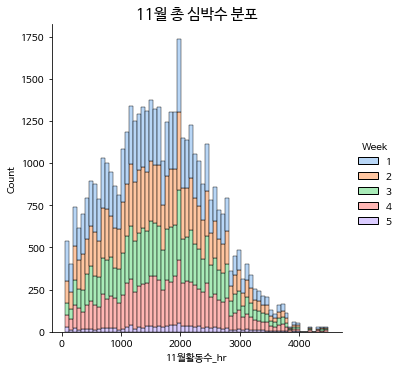

In [ ]:
sns.displot(event_heart, x="11월활동수_hr", hue="Week", multiple="stack", palette = 'pastel')
plt.title('11월 총 심박수 분포', fontsize=15)

Text(0.5, 1.0, '12월 총 심박수 분포')

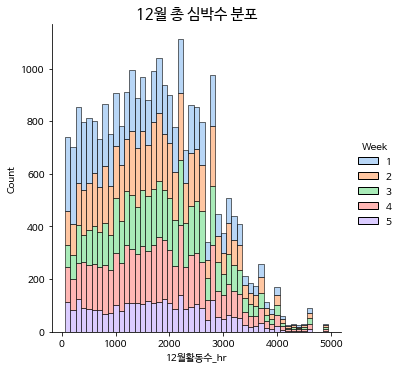

In [ ]:
sns.displot(event_heart, x="12월활동수_hr", hue="Week", multiple="stack", palette = 'pastel')
plt.title('12월 총 심박수 분포', fontsize=15)

Text(0.5, 1.0, '1월 총 심박수 분포')

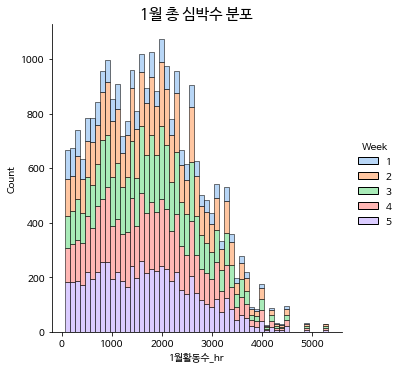

In [ ]:
sns.displot(event_heart, x="1월활동수_hr", hue="Week", multiple="stack", palette = 'pastel')
plt.title('1월 총 심박수 분포', fontsize=15)

Text(0.5, 1.0, '11월 주차별 심박수 분포')

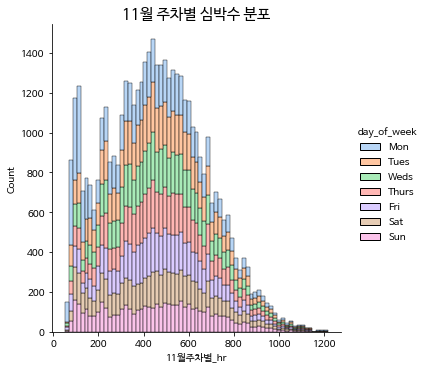

In [ ]:
sns.displot(event_heart, x="11월주차별_hr", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('11월 주차별 심박수 분포', fontsize=15)

Text(0.5, 1.0, '12월 주차별 심박수 분포')

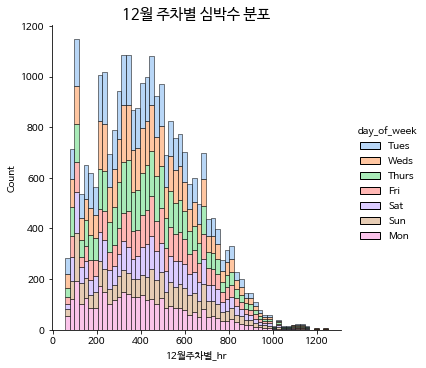

In [ ]:
sns.displot(event_heart, x="12월주차별_hr", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('12월 주차별 심박수 분포', fontsize=15)

Text(0.5, 1.0, '1월 주차별 심박수 분포')

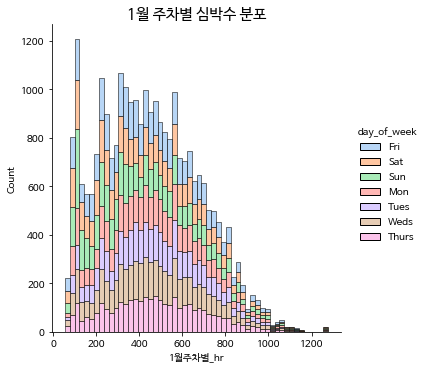

In [ ]:
sns.displot(event_heart, x="1월주차별_hr", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('1월 주차별 심박수 분포', fontsize=15)

Text(0.5, 1.0, '2월 주차별 심박수 분포')

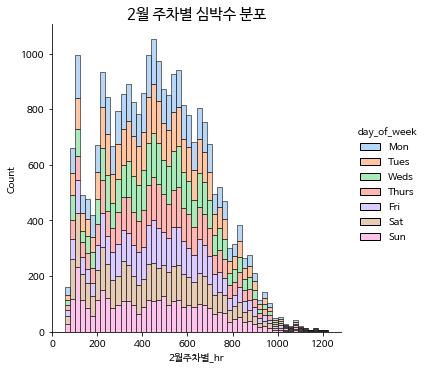

In [ ]:
sns.displot(event_heart, x="2월주차별_hr", hue="day_of_week", multiple="stack", palette = 'pastel')
plt.title('2월 주차별 심박수 분포', fontsize=15)

In [ ]:
event_heart['party_id']=event_heart['party_id'].astype('str')
event_heart['event_id']=event_heart['event_id'].astype('str')
event_heart['Week']=event_heart['Week'].astype('str')
event_heart.describe()

,활동수,1월활동수_hr,1월주차별_hr,1월일별_hr
count,27080.000000,27080.000000,27080.000000,27080.000000
mean,108.286965,1742.897009,445.268390,108.286965
std,27.535663,994.521792,226.941311,27.535663
min,46.000000,62.000000,55.000000,46.000000
25%,85.000000,924.000000,262.000000,85.000000
50%,106.000000,1686.000000,430.000000,106.000000
75%,126.000000,2437.000000,608.000000,126.000000
max,199.000000,5321.000000,1277.000000,199.000000


- 11월 평균 총 심박수 :  1658.78
- 11월 평균 주 심박수 :  454.2
- 11월 평균 일 심박수 :  106.5

- 12월 평균 총 심박수 :  1723.6
- 12월 평균 주 심박수 :  430.3
- 12월 평균 일 심박수 :  107.6

In [ ]:
print('11월 평균 월 활동 심박수 : ', round(event_heart['11월활동수_hr'].mean(),1))
print('11월 평균 주 활동 심박수 : ', round(event_heart['11월주차별_hr'].mean(),1))
print('11월 평균 일 활동 심박수 : ', round(event_heart['11월일별_hr'].mean(),1))

11월 평균 월 활동 심박수 :  1658.8
11월 평균 주 활동 심박수 :  454.2
11월 평균 일 활동 심박수 :  106.5


In [ ]:
print('12월 평균 월 활동 심박수 : ', round(event_heart['12월활동수_hr'].mean(),1))
print('12월 평균 주 활동 심박수 : ', round(event_heart['12월주차별_hr'].mean(),1))
print('12월 평균 일 활동 심박수 : ', round(event_heart['12월일별_hr'].mean(),1))

12월 평균 월 활동 심박수 :  1723.6
12월 평균 주 활동 심박수 :  430.3
12월 평균 일 활동 심박수 :  107.6


In [ ]:
print('1월 평균 월 활동 심박수 : ', round(event_heart['1월활동수_hr'].mean(),1))
print('1월 평균 주 활동 심박수 : ', round(event_heart['1월주차별_hr'].mean(),1))
print('1월 평균 일 활동 심박수 : ', round(event_heart['1월일별_hr'].mean(),1))

1월 평균 월 활동 심박수 :  1742.9
1월 평균 주 활동 심박수 :  445.3
1월 평균 일 활동 심박수 :  108.3


In [ ]:
print('2월 평균 월 활동 심박수 : ', round(event_heart['2월활동수_hr'].mean(),1))
print('2월 평균 주 활동 심박수 : ', round(event_heart['2월주차별_hr'].mean(),1))
print('2월 평균 일 활동 심박수 : ', round(event_heart['2월일별_hr'].mean(),1))

2월 평균 월 활동 심박수 :  1589.7
2월 평균 주 활동 심박수 :  463.4
2월 평균 일 활동 심박수 :  108.7


In [ ]:
print('11월 평균 월 활동 심박수 : ', round(event_heart['11월활동수_hr'].median(),1))
print('11월 평균 주 활동 심박수 : ', round(event_heart['11월주차별_hr'].median(),1))
print('11월 평균 일 활동 심박수 : ', round(event_heart['11월일별_hr'].median(),1))

11월 평균 월 활동 심박수 :  1628.0
11월 평균 주 활동 심박수 :  449.0
11월 평균 일 활동 심박수 :  104.0


In [ ]:
print('12월 평균 월 활동 심박수 : ', round(event_heart['12월활동수_hr'].median(),1))
print('12월 평균 주 활동 심박수 : ', round(event_heart['12월주차별_hr'].median(),1))
print('12월 평균 일 활동 심박수 : ', round(event_heart['12월일별_hr'].median(),1))

12월 평균 월 활동 심박수 :  1679.0
12월 평균 주 활동 심박수 :  415.0
12월 평균 일 활동 심박수 :  105.0


In [ ]:
print('1월 평균 월 활동 심박수 : ', round(event_heart['1월활동수_hr'].median(),1))
print('1월 평균 주 활동 심박수 : ', round(event_heart['1월주차별_hr'].median(),1))
print('1월 평균 일 활동 심박수 : ', round(event_heart['1월일별_hr'].median(),1))

1월 평균 월 활동 심박수 :  1686.0
1월 평균 주 활동 심박수 :  430.0
1월 평균 일 활동 심박수 :  106.0


In [ ]:
print('2월 평균 월 활동 심박수 : ', round(event_heart['2월활동수_hr'].median(),1))
print('2월 평균 주 활동 심박수 : ', round(event_heart['2월주차별_hr'].median(),1))
print('2월 평균 일 활동 심박수 : ', round(event_heart['2월일별_hr'].median(),1))

2월 평균 월 활동 심박수 :  1557.0
2월 평균 주 활동 심박수 :  456.0
2월 평균 일 활동 심박수 :  107.0


###2.요일별/주차별 전체 활동 수

In [ ]:
# 전체 활동건수의 요일별 분포
event['day_of_week'].value_counts() 

Fri      179054
Weds     163224
Mon      158903
Tues     157367
Thurs    151989
Sat      149645
Sun      131031
Name: day_of_week, dtype: int64

In [ ]:
# 전체 활동의 주차별 분포
event['Week'].value_counts() 

4    253168
5    251225
2    248676
3    248348
1     89796
Name: Week, dtype: int64

- 월요일~일요일 순으로 활동수가 많음
- 주차도 1~5주차 순으로 활동수가 많음

Text(0.5, 1.0, '11월 요일별 전체 활동건수 분포')

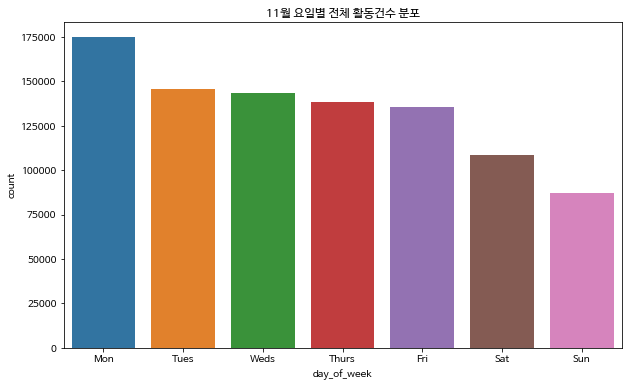

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week", data= event).set_title("11월 요일별 전체 활동건수 분포")

Text(0.5, 1.0, '12월 요일별 전체 활동건수 분포')

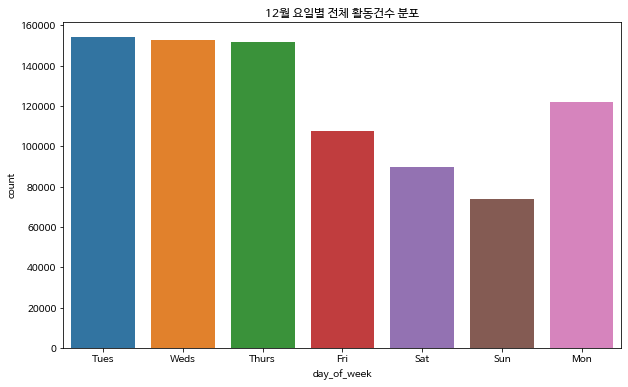

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week", data= event).set_title("12월 요일별 전체 활동건수 분포")

Text(0.5, 1.0, '1월 요일별 전체 활동건수 분포')

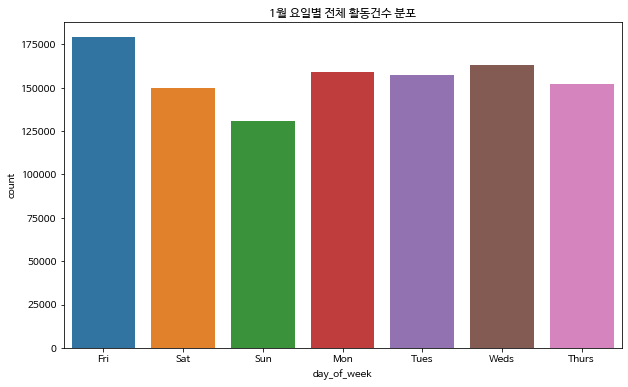

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week", data= event).set_title("1월 요일별 전체 활동건수 분포")

Text(0.5, 1.0, '2월 요일별 전체 활동건수 분포')

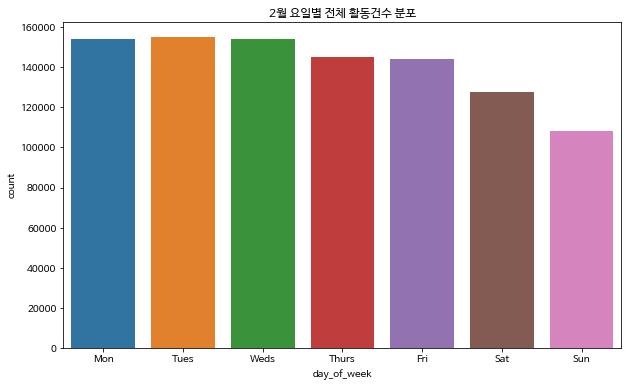

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day_of_week", data= event).set_title("2월 요일별 전체 활동건수 분포")

Text(0.5, 1.0, '11월 주차별 전체 활동건수 분포')

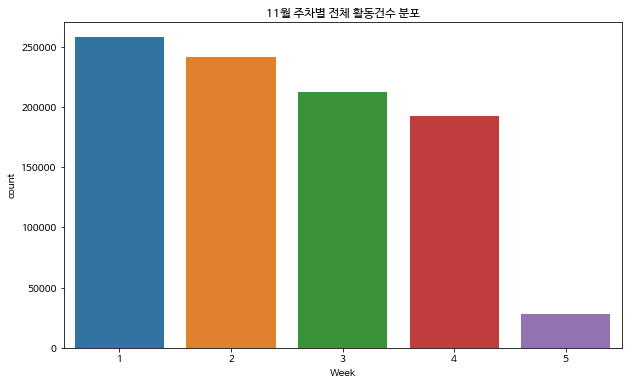

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Week", data= event).set_title( "11월 주차별 전체 활동건수 분포")

Text(0.5, 1.0, '12월 주차별 전체 활동건수 분포')

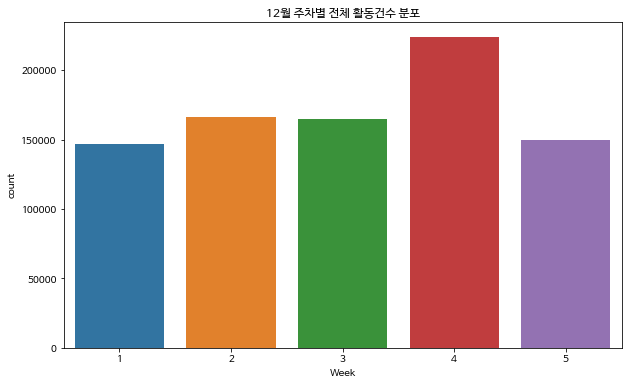

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Week", data= event).set_title( "12월 주차별 전체 활동건수 분포")

Text(0.5, 1.0, '1월 주차별 전체 활동건수 분포')

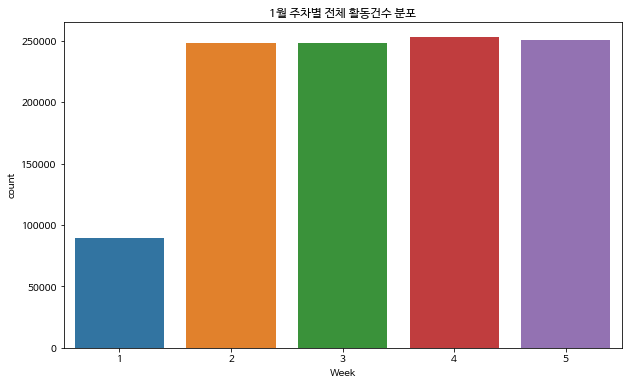

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Week", data= event).set_title( "1월 주차별 전체 활동건수 분포")

Text(0.5, 1.0, '2월 주차별 전체 활동건수 분포')

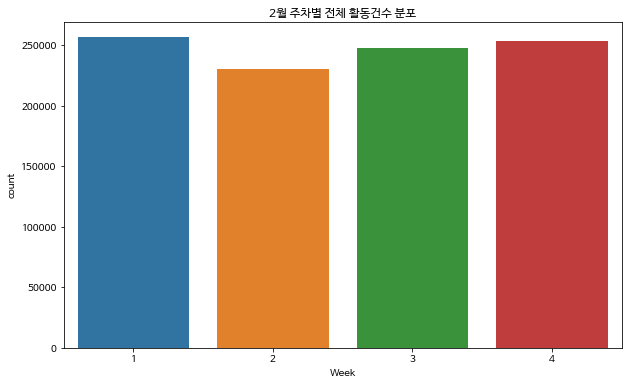

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Week", data= event).set_title( "2월 주차별 전체 활동건수 분포")

###3.성연령별 활동 수

###4.활동 시 연동 디바이스

In [ ]:
event.head(1)

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명
0,2021-01-01,1,Fri,4638477,8678863555,Total Steps,8096,2021-01-02,Steps,20210102,50,20210101,Conditions,You earned the maximum points available for th...,S Health Third-party


In [ ]:
event['디바이스제조사명'].value_counts()

S Health Third-party    567280
#                       428538
Apple                    56242
Garmin                   21005
fitbit                   13753
InBody                    2737
suunto                    1061
strava                     453
Polar                      144
Name: 디바이스제조사명, dtype: int64

In [ ]:
event['디바이스제조사명'].replace({"#": "Unknown"}, inplace=True)
event['디바이스제조사명'].value_counts()

S Health Third-party    567280
Unknown                 428538
Apple                    56242
Garmin                   21005
fitbit                   13753
InBody                    2737
suunto                    1061
strava                     453
Polar                      144
Name: 디바이스제조사명, dtype: int64

Text(0.5, 1.0, '11월 활동 시 연동 디바이스 분포')

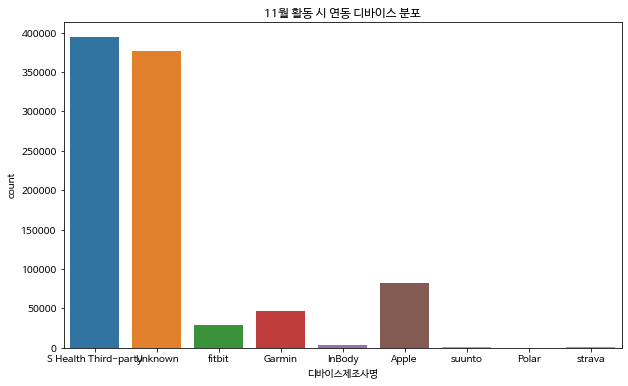

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x="디바이스제조사명", data= event).set_title( "11월 활동 시 연동 디바이스 분포")

Text(0.5, 1.0, '12월 연동 디바이스 분포')

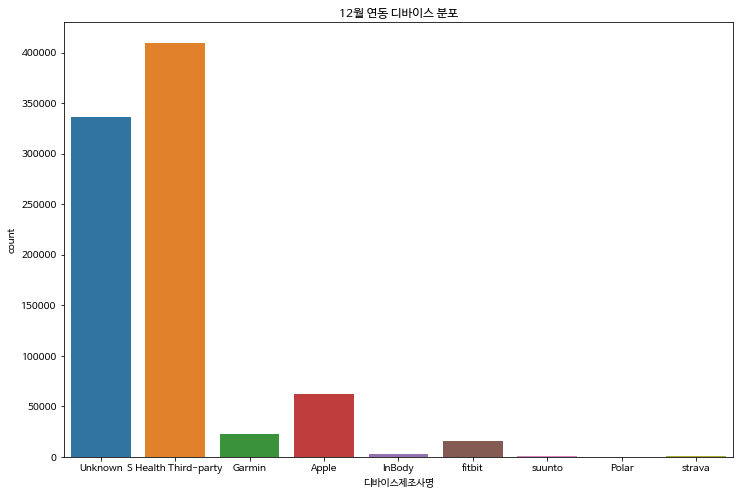

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(x="디바이스제조사명", data= event).set_title( "12월 연동 디바이스 분포")

Text(0.5, 1.0, '1월 연동 디바이스 분포')

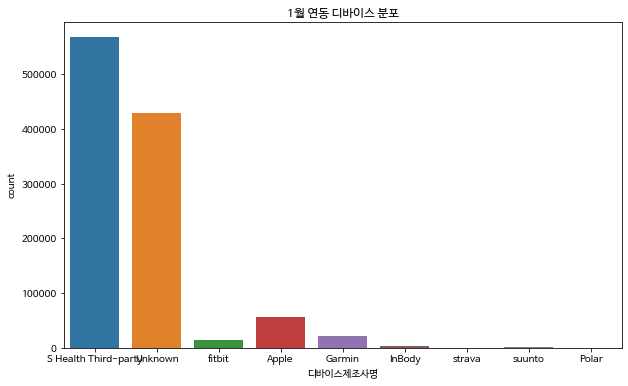

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x="디바이스제조사명", data= event).set_title( "1월 연동 디바이스 분포")

Text(0.5, 1.0, '2월 활동 시 연동 디바이스 분포')

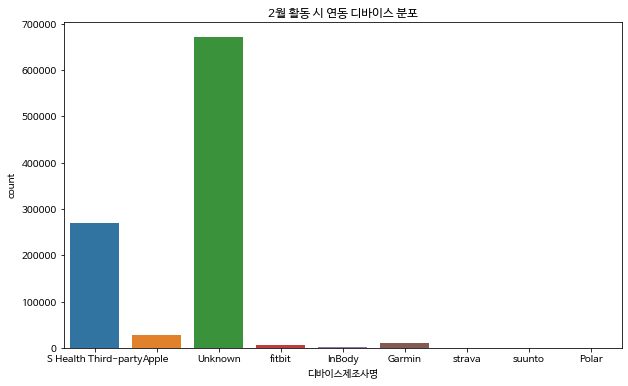

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="디바이스제조사명", data= event).set_title( "2월 활동 시 연동 디바이스 분포")

###5.월별 총/평균 획득포인트, 3개월 총 획득포인트

In [ ]:
event["획득포인트"].replace({"#": "0"}, inplace=True)
event_p = event[event['포인트발생일']!='#']

In [ ]:
event_p.head(1)

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명
0,2021-01-01,1,Fri,4638477,8678863555,Total Steps,8096,2021-01-02,Steps,20210102,50,20210101,Conditions,You earned the maximum points available for th...,S Health Third-party


In [ ]:
event_p['party_id'] = event_p['party_id'].astype('str')
event_p['포인트발생일'] = event_p['포인트발생일'].astype('str')
event_p['포인트발생일'] = pd.to_datetime(event_p['포인트발생일'],format='%Y%m%d')
event_p.head()

,dt,Week,day_of_week,party_id,event_id,이벤트타입명,활동수,이벤트동기화일,활동구분,포인트반영일,획득포인트,포인트발생일,포인트획득사유유형,포인트획득사유,디바이스제조사명
0,2021-01-01,1,Fri,4638477,8678863555,Total Steps,8096,2021-01-02,Steps,20210102,50,2021-01-01,Conditions,You earned the maximum points available for th...,S Health Third-party
3,2021-01-01,1,Fri,9514492,8687562313,Total Steps,10032,2021-01-07,Steps,20210107,50,2021-01-01,Conditions,You earned the maximum points available for th...,Unknown
4,2021-01-01,1,Fri,11735495,8678816802,Total Steps,13069,2021-01-02,Steps,20210102,100,2021-01-01,Conditions,You earned the maximum points available for th...,S Health Third-party
7,2021-01-01,1,Fri,22328999,8678253658,Total Steps,12590,2021-01-01,Steps,20210101,100,2021-01-01,Conditions,You earned the maximum points available for th...,Unknown
8,2021-01-01,1,Fri,27987988,8679213079,Total Steps,13928,2021-01-02,Steps,20210102,100,2021-01-01,Conditions,You earned the maximum points available for th...,Unknown


In [ ]:
event_p['획득포인트']=event_p['획득포인트'].astype('int')
event_p = event_p[['포인트발생일','Week','party_id','획득포인트','포인트획득사유유형','포인트획득사유']]
event_p = event_p.drop_duplicates()
event_p['1월총획득포인트'] = event_p.groupby(['party_id'])['획득포인트'].transform('sum')
event_p['1월주별획득포인트'] = event_p.groupby(['party_id','Week'])['획득포인트'].transform('sum')
event_p # 2월 521,075

,포인트발생일,Week,party_id,획득포인트,포인트획득사유유형,포인트획득사유,1월총획득포인트,1월주별획득포인트
0,2021-01-01,1,4638477,50,Conditions,You earned the maximum points available for th...,2100,100
3,2021-01-01,1,9514492,50,Conditions,You earned the maximum points available for th...,350,150
4,2021-01-01,1,11735495,100,Conditions,You earned the maximum points available for th...,2200,200
7,2021-01-01,1,22328999,100,Conditions,You earned the maximum points available for th...,2200,300
8,2021-01-01,1,27987988,100,Conditions,You earned the maximum points available for th...,2100,100
...,...,...,...,...,...,...,...,...
1091203,2021-01-31,5,1200273962,50,Conditions,You earned the maximum points available for th...,2500,600
1091205,2021-01-31,5,1200277269,100,Conditions,You earned the maximum points available for th...,2250,550
1091207,2021-01-31,5,1200316869,50,Conditions,You earned the maximum points available for th...,1800,600
1091210,2021-01-31,5,1200322614,100,Conditions,You earned the maximum points available for th...,1900,700


In [ ]:
event_p=event_p[['party_id','1월총획득포인트','1월주별획득포인트']]
event_p = event_p.drop_duplicates()
print(len(event_p))
event_p.describe()

105137


,1월총획득포인트,1월주별획득포인트
count,105137.000000,105137.000000
mean,1152.203316,263.281718
std,871.904716,192.767063
min,0.000000,0.000000
25%,350.000000,100.000000
50%,950.000000,200.000000
75%,1950.000000,400.000000
max,3100.000000,750.000000


- 11월 평균 총 획득 포인트 : 1066.0
- 11월 평균 주별 획득 포인트 : 255.1

- 12월 평균 총 획득 포인트 : 1210.7
- 12월 평균 주별 획득 포인트 : 276.9

- 1월 평균 총 획득 포인트 : 1152.2
- 1월 평균 주별 획득 포인트 : 263.3


- 2월 평균 총 획득 포인트 : 1030.8
- 2월 평균 주별 획득 포인트 : 291.1


Text(0.5, 1.0, '11월 총 획득포인트 분포')

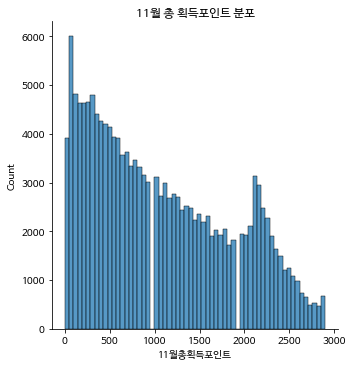

In [ ]:
sns.displot(event_p, x="11월총획득포인트", palette = 'pastel')
plt.title('11월 총 획득포인트 분포')

Text(0.5, 1.0, '12월 총 획득포인트 분포')

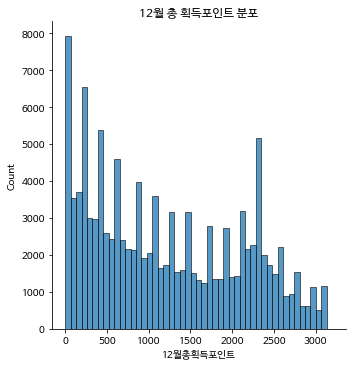

In [ ]:
sns.displot(event_p, x="12월총획득포인트")
plt.title('12월 총 획득포인트 분포')

Text(0.5, 1.0, '1월 총 획득포인트 분포')

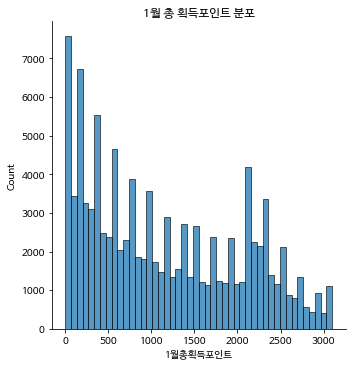

In [ ]:
sns.displot(event_p, x="1월총획득포인트")
plt.title('1월 총 획득포인트 분포')

Text(0.5, 1.0, '2월 총 획득포인트 분포')

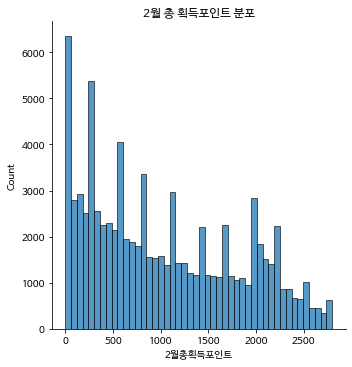

In [ ]:
sns.displot(event_p, x="2월총획득포인트")
plt.title('2월 총 획득포인트 분포')

Text(0.5, 1.0, '11월 주별 획득포인트 분포')

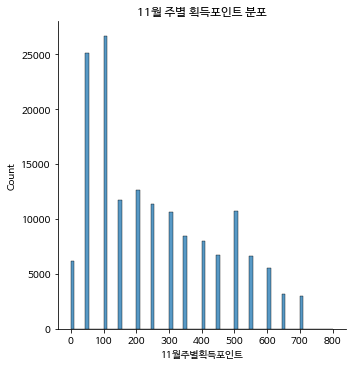

In [ ]:
sns.displot(event_p, x="11월주별획득포인트")
plt.title('11월 주별 획득포인트 분포')

Text(0.5, 1.0, '12월 주별 획득포인트 분포')

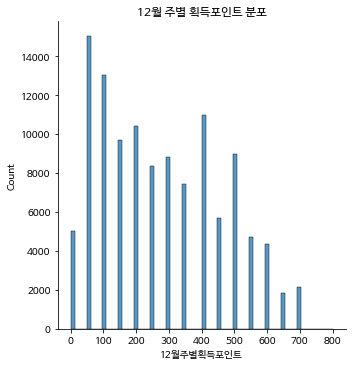

In [ ]:
sns.displot(event_p, x="12월주별획득포인트")
plt.title('12월 주별 획득포인트 분포')

Text(0.5, 1.0, '1월 주별 획득포인트 분포')

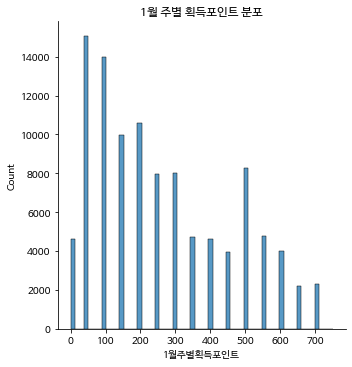

In [ ]:
sns.displot(event_p, x="1월주별획득포인트")
plt.title('1월 주별 획득포인트 분포')

Text(0.5, 1.0, '2월 주별 획득포인트 분포')

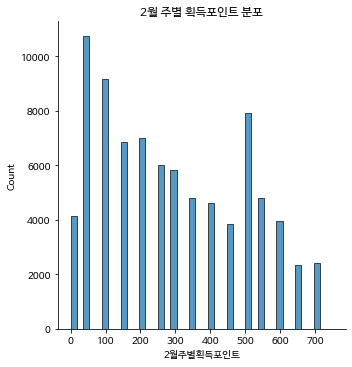

In [ ]:
sns.displot(event_p, x="2월주별획득포인트")
plt.title('2월 주별 획득포인트 분포')

In [ ]:
event['포인트획득사유유형'].value_counts()

Conditions                     512986
#                              487376
Points Entry Category Limit     90851
Name: 포인트획득사유유형, dtype: int64

In [ ]:
event['포인트획득사유'].value_counts()

You earned the maximum points available for this activity                                            501919
#                                                                                                    487376
You have reached the membership limit for this activity category in the current membership period     90851
Higher points have already been awarded for an activity in this group                                  6233
Insufficient activity to earn points                                                                   4834
Name: 포인트획득사유, dtype: int64

In [ ]:
event.to_csv('event_Jan.csv')
event.to_csv('event_p_Jan.csv')

## 리워드 분석항목
1. 월별 리워드 참여자수/참여건수
2. 리워드 유형/금액별 참여률/사용률
3. 리워드 획득 후 앱방문 여부
4. 성/연령별 리워드 참여률/달성률

###1.월별 리워드 참여자수/참여건수

In [ ]:
# 활동별로 파일 쪼개기
Reward = df1[['party_id','리워드설명','리워드시작일', '리워드선택일', '리워드만료일', '리워드사용여부', '리워드금액', '리워드최초선택일']]
Reward =Reward[Reward['리워드설명']!='#']
Reward = Reward.drop_duplicates()
Reward # 58,477 => 52,524 => 48,095 => 36,068

,party_id,리워드설명,리워드시작일,리워드선택일,리워드만료일,리워드사용여부,리워드금액,리워드최초선택일
0,4638477,SK Telecom Voucher,20210103,20210103,20210116,Used,KRW3000.00,20210103
4,11735495,SK Telecom Voucher,20210102,20210102,20210115,Used,KRW3000.00,20210102
8,27987988,Starbucks Voucher,20210110,20210110,20210115,Used,Cup of today's coffee1,20210102
10,30062477,SK Telecom Voucher,20210104,20210104,20210115,Used,KRW3000.00,20210102
12,36000796,KYOBO Book Store,20210104,20210104,20210115,Used,KRW3000.00,20210102
...,...,...,...,...,...,...,...,...
1048021,1200297066,Starbucks Voucher,20210131,20210131,20210213,Used,Cup of today's coffee1,20210131
1052479,169616589,SK Telecom Voucher,20210131,20210131,20210213,Used,KRW3000.00,20210131
1052770,1200307771,SK Telecom Voucher,20210201,20210201,20210214,Used,KRW3000.00,20210201
1057866,1200306922,SK Telecom Voucher,20210201,20210201,20210213,Used,KRW3000.00,20210131


In [ ]:
Reward['party_id'].value_counts() # 리워드 참여자 수 18,155 => 15,851 => 14,667 => 13,083

1200026418    5
200992393     5
1200288770    5
201061393     5
201148458     5
             ..
1200272240    1
1200218857    1
1200210041    1
1200264011    1
1200290662    1
Name: party_id, Length: 15851, dtype: int64

- 11월 리워드 참여자 수 : 18,155명
- 11월 리워드 참여건수 : 58,477


- 12월 리워드 참여자 수 : 15,851명
- 12월 리워드 참여건수 : 52,524 


- 1월 리워드 참여자 수 : 14,667명
- 1월 리워드 참여건수 :  48,095

- 2월 리워드 참여자 수 : 13,083 명
- 2월 리워드 참여건수 :  36,068

###2.리워드 유형/금액별 참여률/사용률

In [ ]:
r_type=Reward['리워드설명'].value_counts()
r_type

SK Telecom Voucher    40516
Starbucks Voucher      5173
Emart                  1772
KYOBO Book Store        634
Name: 리워드설명, dtype: int64

Text(0.5, 1.0, '11월 리워드별 참여률')

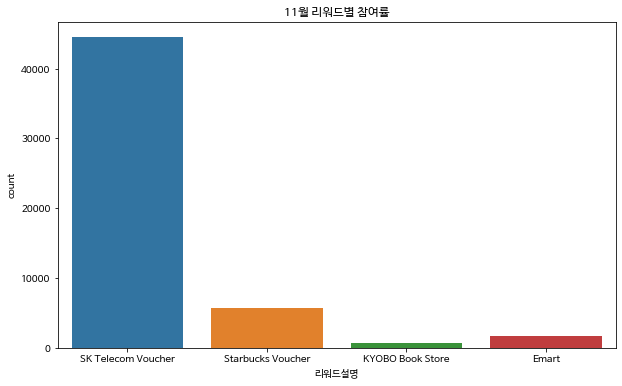

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", data= Reward).set_title("11월 리워드별 참여률")

Text(0.5, 1.0, '12월 리워드별 참여률')

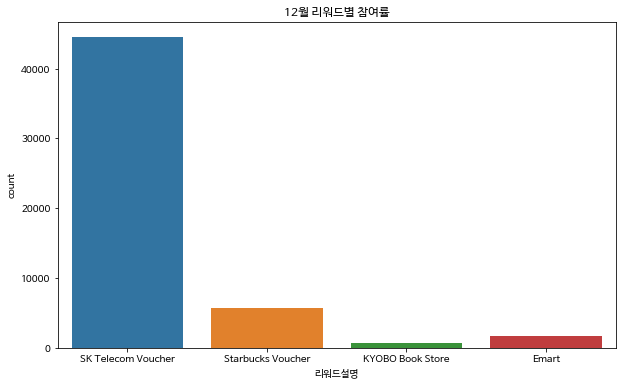

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", data= Reward).set_title("12월 리워드별 참여률")

Text(0.5, 1.0, '1월 리워드별 참여률')

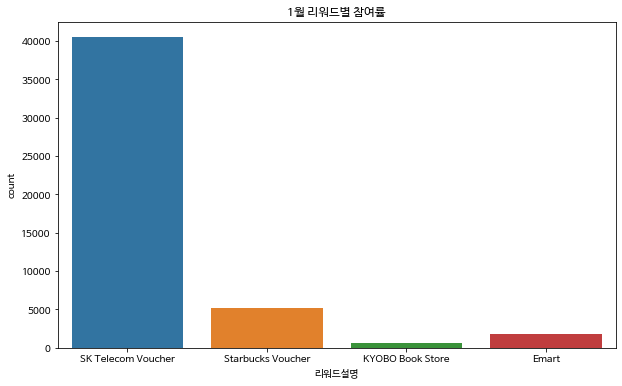

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", data= Reward).set_title("1월 리워드별 참여률")

Text(0.5, 1.0, '2월 리워드별 참여률')

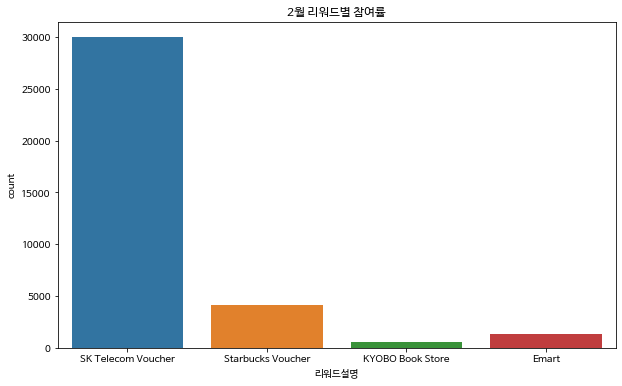

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", data= Reward).set_title("2월 리워드별 참여률")

Text(0.5, 1.0, '11월 리워드별 참여률')

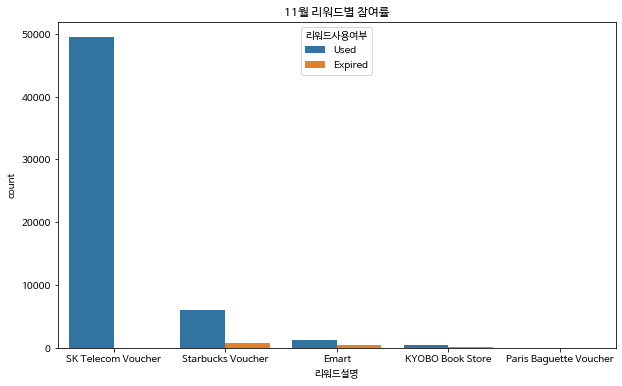

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", hue='리워드사용여부' ,data= Reward).set_title("11월 리워드별 참여률")

Text(0.5, 1.0, '12월 리워드별 참여률')

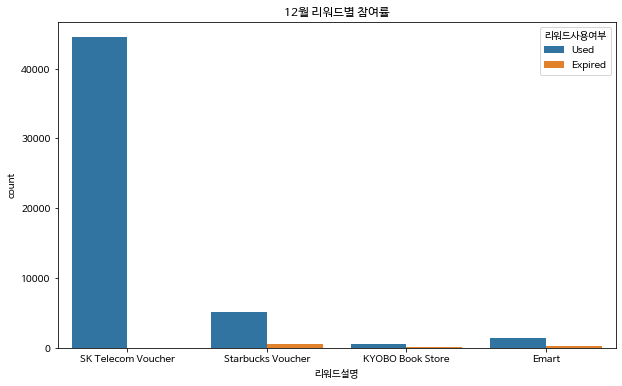

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", hue='리워드사용여부' ,data= Reward).set_title("12월 리워드별 참여률")

Text(0.5, 1.0, '1월 리워드별 참여률')

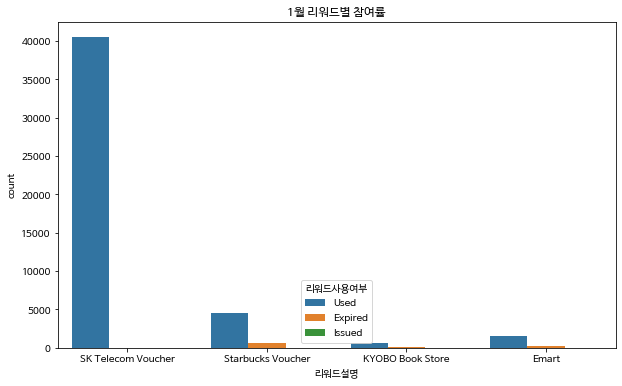

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", hue='리워드사용여부' ,data= Reward).set_title("1월 리워드별 참여률")

Text(0.5, 1.0, '2월 리워드별 참여률')

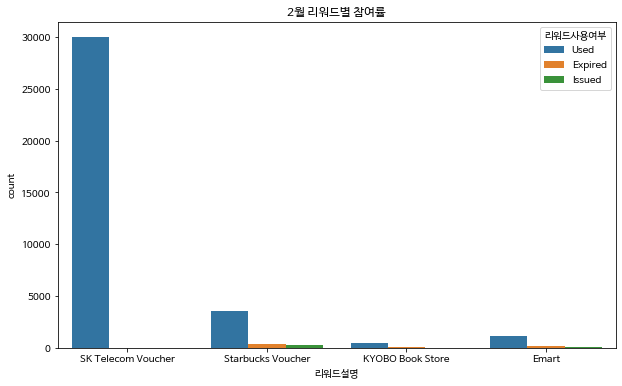

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드설명", hue='리워드사용여부' ,data= Reward).set_title("2월 리워드별 참여률")

Text(0.5, 1.0, '11월 리워드 유형')

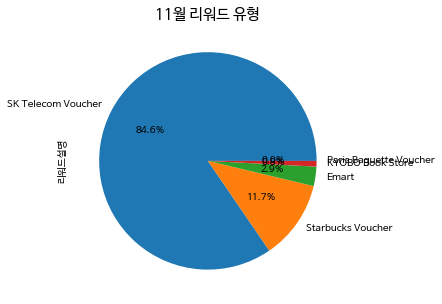

In [ ]:
r_type.plot.pie(autopct="%.1f%%")
plt.title('11월 리워드 유형', fontsize = 15)

Text(0.5, 1.0, '12월 리워드 유형')

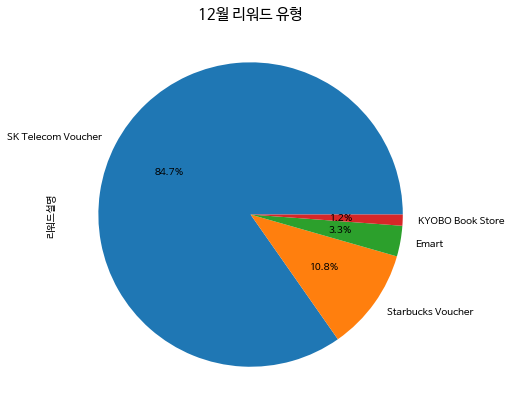

In [ ]:
r_type.plot.pie(autopct="%.1f%%")
plt.title('12월 리워드 유형', fontsize = 15)

Text(0.5, 1.0, '1월 리워드 유형')

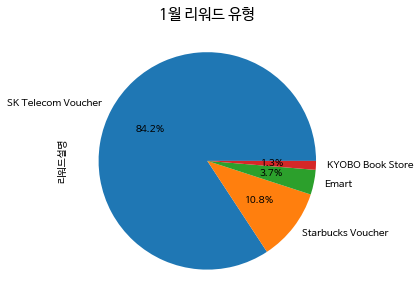

In [ ]:
r_type.plot.pie(autopct="%.1f%%")
plt.title('1월 리워드 유형', fontsize = 15)

Text(0.5, 1.0, '2월 리워드 유형')

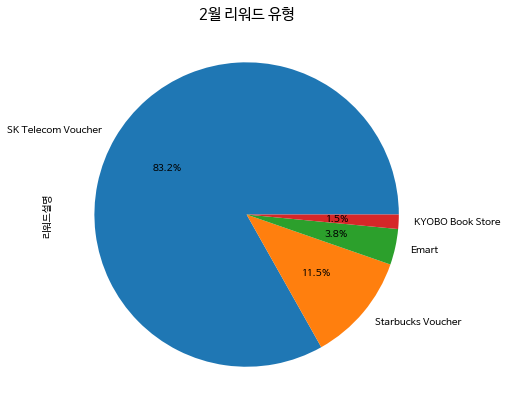

In [ ]:
r_type.plot.pie(autopct="%.1f%%")
plt.title('2월 리워드 유형', fontsize = 15)

In [ ]:
r_yn=Reward['리워드사용여부'].value_counts()
r_yn

Used       47169
Expired      925
Issued         1
Name: 리워드사용여부, dtype: int64

Text(0.5, 1.0, '11월 리워드 사용여부')

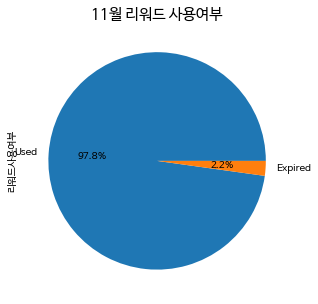

In [ ]:
r_yn.plot.pie(autopct="%.1f%%")
plt.title('11월 리워드 사용여부', fontsize = 15)

Text(0.5, 1.0, '12월 리워드 사용여부')

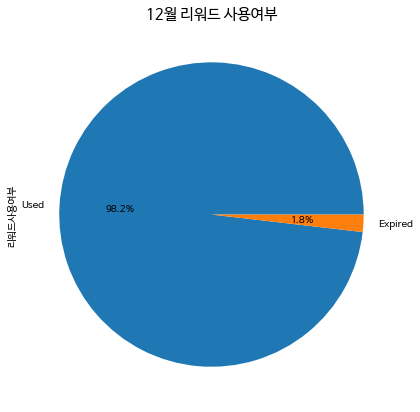

In [ ]:
r_yn.plot.pie(autopct="%.1f%%")
plt.title('12월 리워드 사용여부', fontsize = 15)

Text(0.5, 1.0, '1월 리워드 사용여부')

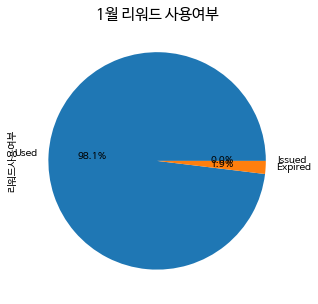

In [ ]:
r_yn.plot.pie(autopct="%.1f%%")
plt.title('1월 리워드 사용여부', fontsize = 15)

Text(0.5, 1.0, '2월 리워드 사용여부')

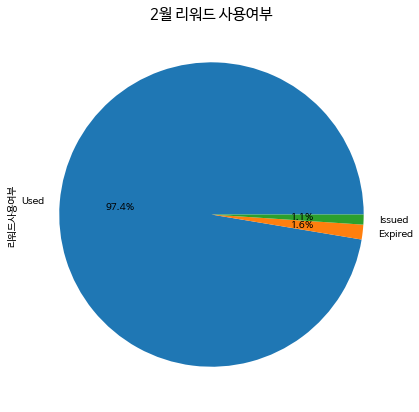

In [ ]:
r_yn.plot.pie(autopct="%.1f%%")
plt.title('2월 리워드 사용여부', fontsize = 15)

In [ ]:
Reward['리워드금액'].value_counts()

KRW3000.00                42922
Cup of today's coffee1     5173
Name: 리워드금액, dtype: int64

Text(0.5, 1.0, '11월 리워드 금액별 참여률')

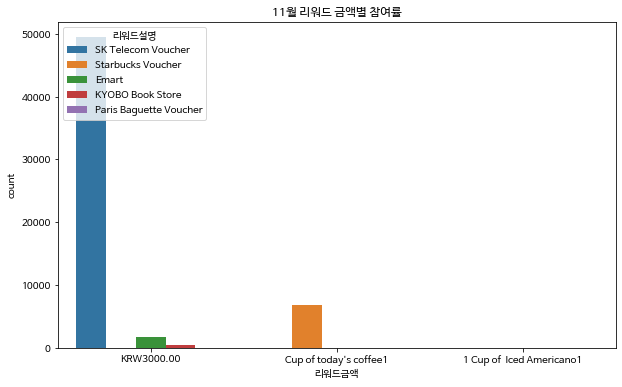

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드금액", hue='리워드설명',data= Reward).set_title("11월 리워드 금액별 참여률")

Text(0.5, 1.0, '12월 리워드 금액별 참여률')

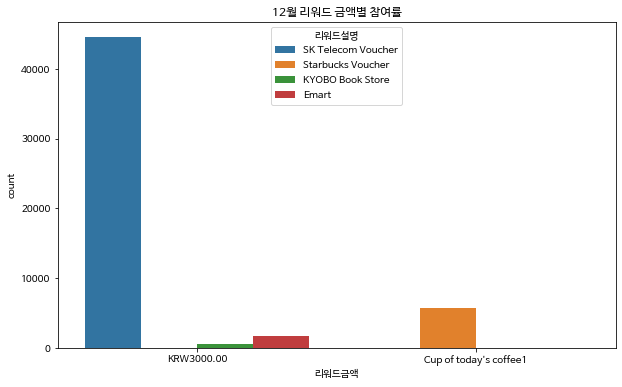

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드금액", hue='리워드설명',data= Reward).set_title("12월 리워드 금액별 참여률")

Text(0.5, 1.0, '1월 리워드 금액별 참여률')

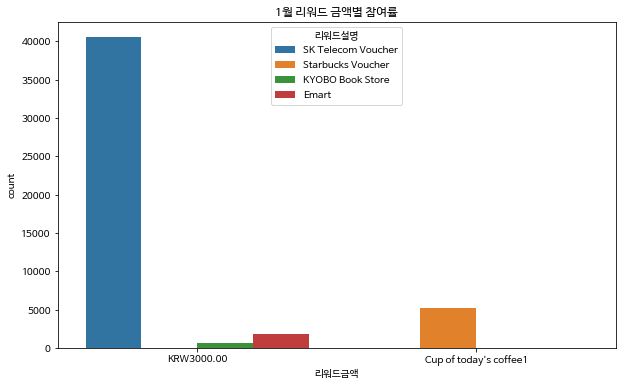

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드금액", hue='리워드설명',data= Reward).set_title("1월 리워드 금액별 참여률")

Text(0.5, 1.0, '2월 리워드 금액별 참여률')

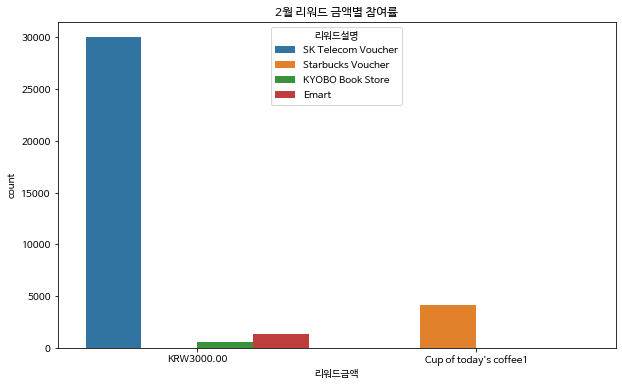

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="리워드금액", hue='리워드설명',data= Reward).set_title("2월 리워드 금액별 참여률")

###3.리워드 획득 후 앱방문 여부
- 11월에 리워드를 받은 고객이 12월에도 앱방문한 비율


In [ ]:
Reward_used =Reward[Reward['리워드사용여부']!='used']
Reward_used=Reward_used[['party_id','리워드설명']]
Reward_used = Reward_used.drop_duplicates()
Reward_used # 20,117

,party_id,리워드설명
0,4638477,SK Telecom Voucher
4,11735495,SK Telecom Voucher
8,27987988,Starbucks Voucher
10,30062477,SK Telecom Voucher
12,36000796,KYOBO Book Store
...,...,...
1043774,200407591,SK Telecom Voucher
1045851,1200307848,Starbucks Voucher
1048021,1200297066,Starbucks Voucher
1052479,169616589,SK Telecom Voucher


In [ ]:
Reward_used['party_id'].value_counts() #11월 리워드 사용자 18,155명,12월 리워드 사용자 15,851, 1월 : 14,667, 2월 : 13,083

1200140157    3
1200146032    3
200738374     3
1200101107    3
1200298667    3
             ..
1200250065    1
1200248016    1
200518863     1
200348872     1
200382103     1
Name: party_id, Length: 14667, dtype: int64

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

applog_02 = pd.read_csv("Applog/applog_202102.csv", usecols= ['party_id'])
applog_02 = applog_02.drop_duplicates()
applog_02['재방문여부']= 'Y'
len(applog_02)

69441

In [ ]:
len(Reward_used)

15775

In [ ]:
applog_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69441 entries, 0 to 13434826
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   party_id  69441 non-null  object
 1   재방문여부     69441 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
applog_02['party_id']=applog_02['party_id'].astype('str')
Reward_used['party_id']=Reward_used['party_id'].astype('str')

In [ ]:
r_used_v_02 = pd.merge(Reward_used, applog_02,how="inner", on=["party_id"])
r_used_v_02

,party_id,리워드설명,재방문여부
0,4638477,SK Telecom Voucher,Y
1,11735495,SK Telecom Voucher,Y
2,27987988,Starbucks Voucher,Y
3,30062477,SK Telecom Voucher,Y
4,36000796,KYOBO Book Store,Y
...,...,...,...
15177,38761095,Starbucks Voucher,Y
15178,1200307848,Starbucks Voucher,Y
15179,1200297066,Starbucks Voucher,Y
15180,169616589,SK Telecom Voucher,Y


In [ ]:
print("11월 리워드 사용 후 다음달 12월 앱 재방문 비율:", round((len(r_used_v_12)/len(Reward_used))*100,1),"%")

11월 리워드 사용 후 다음달 12월 앱 재방문 비율: 96.5 %


In [ ]:
print("12월 리워드 사용 후 다음달 1월 앱 재방문 비율:", round((len(r_used_v_01)/len(Reward_used))*100,1),"%")

12월 리워드 사용 후 다음달 1월 앱 재방문 비율: 96.7 %


In [ ]:
print("12월 리워드 사용 후 +2개월 2월 앱 재방문 비율:", round((len(r_used_v_02)/len(Reward_used))*100,1),"%")

12월 리워드 사용 후 +2개월 2월 앱 재방문 비율: 88.0 %


In [ ]:
print("1월 리워드 사용 후 다음달 2월 앱 재방문 비율:", round((len(r_used_v_02)/len(Reward_used))*100,1),"%")

1월 리워드 사용 후 다음달 2월 앱 재방문 비율: 96.2 %
